In [1]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

# Memory management
import gc 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#from pandas_profiling import ProfileReport
#import lux

import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import scipy
import scipy.stats as stats
from scipy.stats import normaltest
import gc

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score

from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier


from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model  import LogisticRegression


from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.feature_selection import (
    f_classif,
    f_regression,
    mutual_info_classif, 
    mutual_info_regression,
    VarianceThreshold
)
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

# wrapper methods
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# embedded methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE


# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import (
    TomekLinks,
    EditedNearestNeighbours,
)

from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
    SMOTENC,
    KMeansSMOTE
)

from imblearn.combine import SMOTEENN, SMOTETomek

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

from pycaret.classification import *


# COMMON FUNCTIONS 

In [3]:
def discover_app_train_features(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Loan Contract Distribution': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc['TARGET'] = cat_perc['TARGET']*100
    
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    #print(df1.head())
    tot = df1['Loan Contract Distribution'].sum()
    df1['Loan Contract Distribution'] = round(df1['Loan Contract Distribution'] / tot * 100)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    

    
    s = sns.barplot(ax=ax1, x = feature, y="Loan Contract Distribution",data=df1)
    for index, row in df1.iterrows():
        s.text(row.name,row[1], row[1], color='black', ha="center")        
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    for index, row in cat_perc.iterrows():
        s.text(row.name,row[1], round(row[1],0), color='black', ha="center")        
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Loan Default Percentages [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [4]:
# Function to display box plot for univariate analysis 
def disp_boxplot(column):
    plt.figure(figsize=[10,2])
    sns.boxplot(column)
    plt.show()
    
# Function to cap the higher outliers of  the column to the 99 quantile value
def cap_higher_range(df,col_name): 
    q2 = df[col_name].quantile(0.99)
    df[col_name][df[col_name]>=q2]=q2
    
   


In [5]:
def findnulls(df): 
    collist = []
    for col in df.columns : 
        if df[col].isnull().sum() > 0 :
            print (col)
            print (df[col].isnull().sum() * 100 / len(df[col]))

In [6]:
def display_importances(feature_importance_df_):
    # Plot feature importances
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:50].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Dataset Important Features ')
    plt.tight_layout()


In [7]:
def discover_feature_importance(feat_importance):
    feats = [f for f in data.columns if f not in ['SK_ID_CURR']]
    n_fold = 0
    feature_importance_df = pd.DataFrame()
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = feat_importance
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    display_importances(feature_importance_df)


In [8]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [9]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [10]:
def plot_box_comp(var,nrow=2):
    
    i = 0

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,3*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        #plt.subplot(2,2,i)
        sns.boxplot(app_train[feature])
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        
    plt.show();

def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

#### Encode Categorical features

In [11]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

def applyLabelEncoding(df, collist):
    le = LabelEncoder()
    le_count = 0
    for col in collist:
        le.fit(app_train[col])
        # Transform both training and testing data
        df[col] = le.transform(df[col])
    return df

def _applyLabelEncoding(df,collist):
    le = LabelEncoder()
    le_count = 0
    for col in collist :
        le.fit(df[col])
        # Transform both training and testing data
        df[col] = le.transform(df[col])
        
    return df 

def CategoricalEncoding_WOE(df,variable,target_variable):
    # now we calculate the probability of target=1 
    prob_df = df.groupby([variable])[target_variable].mean()
    prob_df = pd.DataFrame(prob_df)
    
    # and now the probability of target = 0 
    # and we add it to the dataframe
    prob_df['target_0'] = 1-prob_df[target_variable]
    prob_df.loc[prob_df[target_variable] == 0, target_variable] = 0.001
    prob_df['WoE'] = np.log(prob_df[target_variable]/prob_df['target_0'])
    ordered_labels = prob_df['WoE'].to_dict()
    df[variable+'_ordered'] = df[variable].map(ordered_labels)
    
def apply_feat_encoding(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    labelencodedfeaturelist =  [col for col in feats if df[col].nunique() <= 3]
    woefeaturelist = [col for col in feats if df[col].nunique() > 3]
    df = _applyLabelEncoding(df,labelencodedfeaturelist)
    target = 'TARGET'
    for col in woefeaturelist:
        CategoricalEncoding_WOE(df,col,target)
    df.drop(woefeaturelist, axis = 1, inplace=True)    
    return df

# get categorical features
#data_cats = _get_categorical_features(data)
#prev_app_cats = _get_categorical_features(previous_application)
#bureau_cats = _get_categorical_features(bureau)
#pcb_cats = _get_categorical_features(pcb)
#ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
#previous_application = _get_dummies(previous_application, prev_app_cats)
#bureau = _get_dummies(bureau, bureau_cats)
#pcb = _get_dummies(pcb, pcb_cats)
#credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
#data = _factorize_categoricals(data, data_cats)

### Missing value functions

In [12]:
def find_missing_columns(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            print (col)
            print (df[col].isnull().sum()* 100 / len(df[col]))

In [13]:
def fill_missing_columns(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(0, inplace = True)

In [14]:
def fill_missing_columns_other_than_target(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if col != 'TARGET':
                df[col].fillna(0, inplace = True)

In [15]:
def get_column_categories(df):
    categorical_columns = []
    for col in df.columns:
        if df[col].dtype in ['object']:
            categorical_columns.append(col)
    numerical_columns = []
    for col in df.columns:
        if col not in categorical_columns:
            numerical_columns.append(col)
    return categorical_columns, numerical_columns

def normal_test(df, significance = .01):
    """
    Function to perform ks test and test against normal distribution using  
    D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”
    
    frame: a pandas dataframe
    significance: float. Alpha level for which the null hypotesis will be rejected (H0: series comes from a normal distribution)
    plot: Boolean, whether or not plot a histogram for resulting columns
    
    returns a dataframe with only those columns that follow a normal distribution according to test.
"""
    columns = df.columns.tolist()
    non_normal_columns = []

    for col in columns:
        aux = df[col]
    
        _, p = normaltest(aux)
    
        if p <= significance:
            # col is not normally distributed
            non_normal_columns.append(col)
        
    normal_columns = [cols for cols in columns if cols not in non_normal_columns]
    return normal_columns, non_normal_columns

# Outlier treatment for Normal distribution
#Treating outliers with top coding-Any value greater than maximum limit will be capped at maximum
def outliers_TopCoding_gaussian(df,variable):
    # top coding: upper boundary for outliers according to gaussian rule
    Upper_fence = df[variable].mean()+3*df[variable].std()
    df.loc[df[variable]>Upper_fence, variable] = Upper_fence
    
    
#Treating outliers with top coding-Any value less than minimum limit will be capped at minimum
def outliers_BottomCoding_gaussian(df,variable):
    # bottom coding: lower boundary for outliers according to gaussian rule
    Lower_fence = df[variable].mean()-3*df[variable].std()
    df.loc[df[variable]<Lower_fence, variable] = Lower_fence    
    
#Outlier treatment for Non-Normal distribution
#Treating outliers with zero coding-Any value less than zero will be made zero
def outliers_ZeroCoding(X,variable):
    X.loc[X[variable]<0, variable] = 0
    
#Treating outliers with top coding-Any value greater than maximum limit will be capped at maximum
def outliers_TopCoding_quantile(df,variable):
    # top coding: upper boundary for outliers according to interquantile proximity rule
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Upper_fence = df[variable].quantile(0.75) + (IQR * 3)
    df.loc[df[variable]>Upper_fence, variable] = Upper_fence
    
#Treating outliers with top coding-Any value less than minimum limit will be capped at minimum
def outliers_BottomCoding_quantile(df,variable):
    # bottom coding: lower boundary for outliers according to interquantile proximity rule
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_fence = df[variable].quantile(0.25) - (IQR * 3)
    df.loc[df[variable]<Lower_fence, variable] = Lower_fence    

In [16]:
def disp_box(df,collist,nrow=3):
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))
    i = 0

    for col in collist:
        i += 1
        plt.subplot(nrow,2,i)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

def disp_dist(df,collist,nrow=3):

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))
    i = 0

    for col in collist:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(df[col], bw=0.5)
        plt.xlabel(col, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


In [17]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [18]:
# One-hot encoding for categorical columns with get_dummies
def old_one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [19]:
def CategoricalEncoding_WOE(df,variable,target_variable):
    # now we calculate the probability of target=1 
    prob_df = df.groupby([variable])[target_variable].mean()
    prob_df = pd.DataFrame(prob_df)
    
    # and now the probability of target = 0 
    # and we add it to the dataframe
    prob_df['target_0'] = 1-prob_df[target_variable]
    prob_df.loc[prob_df[target_variable] == 0, target_variable] = 0.001
    prob_df['WoE'] = np.log(prob_df[target_variable]/prob_df['target_0'])
    ordered_labels = prob_df['WoE'].to_dict()
    df[variable+'_ordered'] = df[variable].map(ordered_labels)
    
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    woefeaturelist = [col for col in feats if df[col].nunique() > 1]
    target = 'TARGET'
    for col in woefeaturelist:
        CategoricalEncoding_WOE(df,col,target)
    new_columns = [c for c in df.columns if c not in original_columns]
    df.drop(woefeaturelist, axis = 1, inplace=True)   
    
    return df, new_columns


In [20]:
def remove_columns_app_train(train):
    collist = []
    for col in train.columns:
        if (train[col].isnull().sum() *100 / len(train[col])) > 47 :
            if col.startswith('EXT_SOURCE') or col.startswith('HOUSETYPE_MODE') or col.startswith('EMERGENCYSTATE_MODE'):
                i=0
            else :
                collist.append(col)
    train.drop(collist, axis = 1, inplace=True)
    collist = []
    for col in train.columns:
        if col.startswith('FLAG_DOC'):
                collist.append(col)
    collist.remove('FLAG_DOCUMENT_3')
    train.drop(collist, axis = 1, inplace=True)
    columns_drop = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']
    train.drop(columns_drop, axis = 1, inplace=True)
    


#    APPLICATION DATASET MISSING VALUE TREATMENT 
def treat_missing_values_app_train(train):
    # EXT_SOURCE_1 : 173378 entries ( 56%) have null values out of a total of 307511 Entries. The median value is 0.506. 
    train['EXT_SOURCE_1'].fillna(0.506, inplace = True)
    # EXT_SOURCE_2 : 660 entries have null values out of a total of 307511 Entries. The median value is 0.566. 
    train['EXT_SOURCE_2'].fillna(0.566, inplace = True)
    # EXT_SOURCE_3 : 60965 entries (19.8% )have null values out of a total of 307511 Entries. The median value is 0.535. 
    train['EXT_SOURCE_3'].fillna(0.535, inplace = True)
    # NAME_TYPE_SUITE : 1292 entries have null values out of 307511. Value imputed to "Unaccompanied" which is highest value 248526 for field
    train['NAME_TYPE_SUITE'].fillna("Unaccompanied", inplace = True)
    #DEF_30_CNT_SOCIAL_CIRCLE : 1021 entries have null values out of 307511. Missing value imputed to median value of 0.0
    train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace = True)
    #DEF_60_CNT_SOCIAL_CIRCLE : 1021 entries have null values out of 307511. Missing value imputed to median value of 0.0
    train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace = True)
    #OBS_30_CNT_SOCIAL_CIRCLE : 1021 entries have null values out of 307511. Missing value imputed to median value of 0.0
    train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace = True)
    #OBS_60_CNT_SOCIAL_CIRCLE : 1021 entries have null values out of 307511. Missing value imputed to median value of 0.0
    train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.0, inplace = True)
    train['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].fillna(0)
    train['HOUSETYPE_MODE'].fillna('block of flats', inplace=True)
    train['EMERGENCYSTATE_MODE'].fillna('No', inplace=True)
    train['OCCUPATION_TYPE'].fillna('Others', inplace=True)
   
    
    # TREAT THE AMT COLUMNS. FIX OUTLIERS AND ANOMALIES. REMOVE NULLS AND MISSING VALUES 
    for col in train.columns:
        if col.startswith('AMT'):
            train[col] = train[col] / 100000
    train['AMT_INCOME_TOTAL'][train['AMT_INCOME_TOTAL'] > 3] = 3
    train['AMT_INCOME_TOTAL'][train['AMT_INCOME_TOTAL'] < 0.5] = 0.5
    train['AMT_CREDIT'][train['AMT_CREDIT'] > 11] = 11
    train['AMT_ANNUITY'][train['AMT_ANNUITY'] > 0.45] = 0.45
    train['AMT_GOODS_PRICE'][train['AMT_GOODS_PRICE'] > 10] = 10
    for col in train.columns:
        if col.startswith('AMT'):
            train[col] = train[col] * 100000
    train['AMT_REQ_CREDIT_BUREAU_YEAR'][train['AMT_REQ_CREDIT_BUREAU_YEAR'] > 3.5] = 3.5
    for col in train.columns:
        if col.startswith('AMT'):
            if train[col].isnull().sum() > 0:
                #print (col)
                #print (train[col].isnull().sum() / len(train[col]*100))
                train[col].fillna(0, inplace = True)    

    train['CNT_CHILDREN'][train['CNT_CHILDREN'] > 5] = 5
    train['CNT_FAM_MEMBERS'][train['CNT_FAM_MEMBERS'] > 5] = 5
    train['REGION_POPULATION_RELATIVE'][train['REGION_POPULATION_RELATIVE'] > 0.05] = 0.05
    train['OBS_30_CNT_SOCIAL_CIRCLE'][train['OBS_30_CNT_SOCIAL_CIRCLE'] > 10] = 10
    train['OBS_60_CNT_SOCIAL_CIRCLE'][train['OBS_60_CNT_SOCIAL_CIRCLE'] > 10] = 10
    train['DEF_30_CNT_SOCIAL_CIRCLE'][train['DEF_30_CNT_SOCIAL_CIRCLE'] > 3] = 3
    train['DEF_60_CNT_SOCIAL_CIRCLE'][train['DEF_60_CNT_SOCIAL_CIRCLE'] > 3] = 3
                
    
    # TREAT THE DAYS COLUMNS. FIX OUTLIERS AND ANOMALIES. REMOVE NULLS AND MISSING VALUES 
    for col in train.columns:
        if col.startswith('DAY'):
            if train[col].isnull().sum() > 0:
                train[col].fillna(0, inplace = True)
            train[col] = train[col] / 365
    train['DAYS_EMPLOYED'][train['DAYS_EMPLOYED'] > 1000] = 0
    train['DAYS_EMPLOYED'][train['DAYS_EMPLOYED'] < -10] = -10
    train['DAYS_REGISTRATION'][train['DAYS_REGISTRATION'] < -27] = -27
    train['DAYS_LAST_PHONE_CHANGE'][train['DAYS_LAST_PHONE_CHANGE'] < -6] =-6
    # FIX ANOMALIES AND MISSING VALUES
    train['CODE_GENDER'].value_counts()
    train['CODE_GENDER'].replace('XNA', 'F', inplace =True)
    

    return train    

In [21]:
#            BUREAU MISSING VALUE TREATMENT 
def treat_missing_values_bureau(df_bueau):
    df_bueau['DAYS_CREDIT_ENDDATE'][df_bueau['DAYS_CREDIT_ENDDATE'] < -2300] = -2300
    df_bueau['DAYS_CREDIT_ENDDATE'][df_bueau['DAYS_CREDIT_ENDDATE'] > 1600] = 1600
    df_bueau['DAYS_ENDDATE_FACT'][df_bueau['DAYS_ENDDATE_FACT'] < -2000] = -2000
    df_bueau['AMT_CREDIT_SUM'][df_bueau['AMT_CREDIT_SUM'] > 500000] = 500000
    df_bueau['AMT_CREDIT_SUM_DEBT'][df_bueau['AMT_CREDIT_SUM_DEBT'] > 50000]  = 50000
    df_bueau['AMT_CREDIT_SUM_DEBT'][df_bueau['AMT_CREDIT_SUM_DEBT'] < -600] = -600
    df_bueau['DAYS_CREDIT_UPDATE'][df_bueau['DAYS_CREDIT_UPDATE'] < -1500] = -1500
    df_bueau['DAYS_CREDIT_ENDDATE'].fillna(-330, inplace =True)
    df_bueau['AMT_CREDIT_SUM'].fillna(125518.5, inplace = True)
    df_bueau['DAYS_ENDDATE_FACT'].fillna(-897, inplace =True)
    df_bueau['AMT_CREDIT_SUM_DEBT'].fillna(0, inplace =True)
    # CREDIT_DAY_OVERDUE majority are 0.. can be dropped
    # only 7 % of data is above zero
    # CNT_CREDIT_PROLONG only 0.5% of data is above zero
    #AMT_CREDIT_SUM_LIMIT only a fraction of values are not zero
    return df_bueau

def remove_columns_bureau(df_bueau):
    coldrop = ['CREDIT_DAY_OVERDUE', 'AMT_CREDIT_MAX_OVERDUE','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE','AMT_ANNUITY'] 
    df_bueau.drop(coldrop, axis = 1, inplace=True)


In [22]:
#            PREV_APP MISSING VALUE TREATMENT 
def treat_missing_values_prev_app(df_prev_app):
    df_prev_app['AMT_ANNUITY'][df_prev_app['AMT_ANNUITY'] > 20000] = 20000
    df_prev_app['AMT_ANNUITY'][df_prev_app['AMT_ANNUITY'] < 5000] = 5000
    df_prev_app['AMT_APPLICATION'][df_prev_app['AMT_APPLICATION'] > 200000] = 200000
    df_prev_app['AMT_CREDIT'][df_prev_app['AMT_CREDIT'] > 250000] = 250000
    df_prev_app['AMT_GOODS_PRICE'][df_prev_app['AMT_GOODS_PRICE'] > 250000] = 250000
    df_prev_app['HOUR_APPR_PROCESS_START'][df_prev_app['HOUR_APPR_PROCESS_START'] >17] = 17
    df_prev_app['HOUR_APPR_PROCESS_START'][df_prev_app['HOUR_APPR_PROCESS_START'] <8] = 8
    df_prev_app['SELLERPLACE_AREA'][df_prev_app['SELLERPLACE_AREA'] > 100 ] = 100
    df_prev_app['DAYS_DECISION'][df_prev_app['DAYS_DECISION'] < -2000] = -2000
    df_prev_app['RATE_DOWN_PAYMENT'][df_prev_app['RATE_DOWN_PAYMENT'] >0.125] = 0.125
    df_prev_app['CNT_PAYMENT'][df_prev_app['CNT_PAYMENT'] > 25 ] = 25
    df_prev_app['DAYS_LAST_DUE'][df_prev_app['DAYS_LAST_DUE'] > 0 ] = 0
    df_prev_app['DAYS_LAST_DUE'][df_prev_app['DAYS_LAST_DUE'] <-1500 ] = -1500
    df_prev_app['DAYS_LAST_DUE_1ST_VERSION'][df_prev_app['DAYS_LAST_DUE_1ST_VERSION'] > 0 ]= 0
    df_prev_app['DAYS_LAST_DUE_1ST_VERSION'][df_prev_app['DAYS_LAST_DUE_1ST_VERSION'] < -1400 ] = -1400
    df_prev_app['DAYS_FIRST_DUE'][df_prev_app['DAYS_FIRST_DUE'] > -250 ] = -250
    df_prev_app['DAYS_DECISION'][df_prev_app['DAYS_DECISION'] < -1750 ] = -1750
    df_prev_app['DAYS_FIRST_DUE'][df_prev_app['DAYS_FIRST_DUE'] < -1700 ] = -1700
    df_prev_app['DAYS_TERMINATION'][df_prev_app['DAYS_TERMINATION'] > 0 ] = 0
    df_prev_app['DAYS_TERMINATION'][df_prev_app['DAYS_TERMINATION'] < -1700 ] = -1700
    df_prev_app['AMT_ANNUITY'].fillna(11250.0, inplace=True)
    df_prev_app['AMT_CREDIT'].fillna(80541.0, inplace=True)
    df_prev_app['AMT_GOODS_PRICE'].fillna(112320.0, inplace=True)
    df_prev_app['RATE_DOWN_PAYMENT'].fillna(0.0516, inplace=True)
    df_prev_app['CNT_PAYMENT'].fillna(12.0, inplace=True)
    df_prev_app['DAYS_FIRST_DUE'].fillna(-831.0, inplace=True)
    df_prev_app['DAYS_LAST_DUE_1ST_VERSION'].fillna(-361, inplace=True)
    df_prev_app['DAYS_LAST_DUE'].fillna(-537.0, inplace=True)
    df_prev_app['DAYS_TERMINATION'].fillna(-499.0, inplace=True)
    df_prev_app['NFLAG_INSURED_ON_APPROVAL'].fillna(0, inplace=True)
    df_prev_app['PRODUCT_COMBINATION'].fillna("Cash", inplace = True)
    df_prev_app['NAME_CONTRACT_TYPE'][df_prev_app['NAME_CONTRACT_TYPE'] == 'XNA'] = "Cash loans"
    return df_prev_app

def remove_columns_prev_app(df_prev_app):
    coldrop = ['DAYS_FIRST_DRAWING','AMT_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE']
    df_prev_app.drop(coldrop, axis = 1, inplace=True)


In [23]:
#            POS_CASH_BAL MISSING VALUE TREATMENT 
def treat_missing_values_pos_cash_bal(df_pos_cash_bal):
    df_pos_cash_bal['CNT_INSTALMENT_FUTURE'][df_pos_cash_bal['CNT_INSTALMENT_FUTURE'] > 15 ] = 15
    df_pos_cash_bal['MONTHS_BALANCE'][df_pos_cash_bal['MONTHS_BALANCE'] < -70 ] = -70
    df_pos_cash_bal['CNT_INSTALMENT'][df_pos_cash_bal['CNT_INSTALMENT'] > 25 ] = 25
    df_pos_cash_bal['CNT_INSTALMENT'].fillna(12.0, inplace=True)
    df_pos_cash_bal['CNT_INSTALMENT_FUTURE'].fillna(7.0, inplace=True)
    return df_pos_cash_bal

def remove_columns_pos_cash_bal(df_pos_cash_bal):
    coldrop = ['SK_DPD','SK_DPD_DEF']
    df_pos_cash_bal.drop(coldrop, axis = 1, inplace=True)

In [24]:
#            CREDIT_CARD DATASET MISSING VALUE TREATMENT 
def treat_missing_values_cc_bal(df_cc_bal):
    df_cc_bal['AMT_ANNUITY'][df_cc_bal['AMT_ANNUITY'] > 25000 ] = 25000
    df_cc_bal['AMT_APPLICATION'][df_cc_bal['AMT_APPLICATION'] > 200000 ] = 200000
    df_cc_bal['AMT_GOODS_PRICE'][df_cc_bal['AMT_GOODS_PRICE'] > 300000 ] = 300000
    df_cc_bal['AMT_CREDIT'][df_cc_bal['AMT_CREDIT'] > 300000 ] = 300000
    df_cc_bal['HOUR_APPR_PROCESS_START'][df_cc_bal['HOUR_APPR_PROCESS_START'] > 17 ] = 17
    df_cc_bal['HOUR_APPR_PROCESS_START'][df_cc_bal['HOUR_APPR_PROCESS_START'] < 8 ] = 8
    df_cc_bal['RATE_DOWN_PAYMENT'][df_cc_bal['RATE_DOWN_PAYMENT'] >0.15] = 0.15
    df_cc_bal['DAYS_DECISION'][df_cc_bal['DAYS_DECISION'] < -1750 ] = -1750
    df_cc_bal['SELLERPLACE_AREA'][df_cc_bal['SELLERPLACE_AREA'] > 100 ] = 100
    df_cc_bal['CNT_PAYMENT'][df_cc_bal['CNT_PAYMENT'] > 25 ] = 25
    df_cc_bal['DAYS_LAST_DUE'][df_cc_bal['DAYS_LAST_DUE'] <-1500 ] = -1500
    df_cc_bal['DAYS_LAST_DUE_1ST_VERSION'][df_cc_bal['DAYS_LAST_DUE_1ST_VERSION'] > 0 ]= 0
    df_cc_bal['DAYS_LAST_DUE_1ST_VERSION'][df_cc_bal['DAYS_LAST_DUE_1ST_VERSION'] < -1400 ] = -1400
    df_cc_bal['DAYS_FIRST_DUE'][df_cc_bal['DAYS_FIRST_DUE'] > -250 ] = -250    
    df_cc_bal['DAYS_FIRST_DUE'][df_cc_bal['DAYS_FIRST_DUE'] < -1700 ] = -1700
    df_cc_bal['DAYS_TERMINATION'][df_cc_bal['DAYS_TERMINATION'] > 0 ] = 0
    df_cc_bal['DAYS_TERMINATION'][df_cc_bal['DAYS_TERMINATION'] < -1700 ] = -1700
    df_cc_bal['AMT_ANNUITY'].fillna(11250.0, inplace=True)
    df_cc_bal['AMT_CREDIT'].fillna(80541.0, inplace=True)
    df_cc_bal['AMT_GOODS_PRICE'].fillna(112320.0, inplace=True)
    df_cc_bal['RATE_DOWN_PAYMENT'].fillna(0.0516, inplace=True)
    df_cc_bal['CNT_PAYMENT'].fillna(12.0, inplace=True)
    df_cc_bal['DAYS_FIRST_DUE'].fillna(-831.0, inplace=True)
    df_cc_bal['DAYS_LAST_DUE_1ST_VERSION'].fillna(-361, inplace=True)
    df_cc_bal['DAYS_LAST_DUE'].fillna(-537.0, inplace=True)
    df_cc_bal['DAYS_TERMINATION'].fillna(-499.0, inplace=True)
    df_cc_bal['NFLAG_INSURED_ON_APPROVAL'].fillna(0, inplace=True)
    df_cc_bal['PRODUCT_COMBINATION'].fillna("Cash", inplace = True)
    df_cc_bal['NAME_CONTRACT_TYPE'][df_prev_app['NAME_CONTRACT_TYPE'] == 'XNA'] = "Cash loans"
    return df_cc_bal

def remove_columns_cc_bal(df_cc_bal):
    coldrop = ['DAYS_FIRST_DRAWING','AMT_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE']
    df_cc_bal.drop(coldrop, axis = 1, inplace=True)

In [25]:
#            INSTALLMENT PAYMENT DATASET MISSING VALUE TREATMENT 
def treat_missing_values_inst_pay(df_inst_pay):
    df_inst_pay['AMT_PAYMENT'][df_inst_pay['AMT_PAYMENT'] > 30000 ] = 30000
    df_inst_pay['AMT_PAYMENT'].fillna(8125.515, inplace = True)
    df_inst_pay['AMT_INSTALMENT'][df_inst_pay['AMT_INSTALMENT'] > 30000 ] = 30000
    df_inst_pay['AMT_INSTALMENT'].fillna(8884.08, inplace = True)
    df_inst_pay['DAYS_ENTRY_PAYMENT'].fillna(-827.0, inplace = True)
    df_inst_pay['DAYS_ENTRY_PAYMENT'][df_inst_pay['DAYS_ENTRY_PAYMENT'] < -2000 ] = -2000
    df_inst_pay['DAYS_INSTALMENT'][df_inst_pay['DAYS_INSTALMENT'] < -2000 ] = -2000
    df_inst_pay['NUM_INSTALMENT_NUMBER'][df_inst_pay['NUM_INSTALMENT_NUMBER'] > 35 ] = 35    
    return df_inst_pay

# CLASS IMBALANCE TECHNIQUES

In [26]:
# method for testing
def run_method(method, df, target):
    class_cnt = df[target].value_counts()
    print('Before run size majority:{0}, minority:{1}'.format(class_cnt[0], class_cnt[1]))
    df_sampled = method(df,target)
    class_cnt = df_sampled[target].value_counts()
    print('After run size majority:{0}, minority:{1}'.format(class_cnt[0], class_cnt[1]))
    return df_sampled

In [27]:
def apply_adasyn_oversampling(df, target, strategy='auto'):
    
    # define oversampling strategy
    ada = ADASYN(
        sampling_strategy=strategy,  # samples only the minority class
        random_state=0,  # for reproducibility
        n_neighbors=5,
        n_jobs=4
    )   
    
    #separate train and test
    x_train = df.drop(columns=[target])
    y_train=df[target]
    
    # fit and apply the transform
    x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
    
    # merging y to x
    x_train_resampled[target] = y_train_resampled
    return x_train_resampled

In [28]:
def apply_tomeklink_undersampling(df, target, strategy='auto'):
    
    # define oversampling strategy
    tl = TomekLinks(
        sampling_strategy=strategy,  # undersamples only the majority class
        n_jobs=4                   # I have 4 cores in my laptop
    )    
    
    # fit and apply the transform
    x_train = df.drop(columns=[target])
    y_train=df[target]
    x_train_resampled, y_train_resampled = tl.fit_resample(x_train, y_train)
    
    # merging y to x
    x_train_resampled[target] = y_train_resampled
    return x_train_resampled

In [29]:
def apply_editednearestneighbour_undersampling(df, target, strategy='majority'):
    
    # define oversampling strategy
    enn = EditedNearestNeighbours(
        sampling_strategy='auto',  # undersamples only the majority class
        n_neighbors=3,
        kind_sel='all',            # all neighbours need to have the same label as the observation examined
        n_jobs=4                   # I have 4 cores in my laptop 
    ) 
    
    # fit and apply the transform
    x_train = df.drop(columns=[target])
    y_train=df[target]
    x_train_resampled, y_train_resampled = enn.fit_resample(x_train, y_train)
    
    # merging y to x
    x_train_resampled[target] = y_train_resampled
    return x_train_resampled

In [30]:
def apply_smote_oversampling(df, target, strategy='auto'):
    sm = SMOTE(
        random_state=42,
        sampling_strategy=strategy,
        n_jobs=4
    )

    x_train = df.drop(columns=[target])
    y_train=df[target]
    
    x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

    x_train_sm[target] = y_train_sm
    return x_train_sm

In [31]:
def apply_sm_tomek_sampling(df, target, strategy='auto'):
    
    # define oversampling strategy
    sm = SMOTE(
        sampling_strategy=strategy,  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        n_jobs=4
    )
    
    # define under sampling strategy
    # need tomek as argument of SMOTETomek
    tl = TomekLinks(
        sampling_strategy='all',
        n_jobs=4)

    smtomek = SMOTETomek(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        smote=sm,
        tomek=tl,
        n_jobs=4
    )
    
    #separate train and test
    x_train = df.drop(columns=[target])
    y_train=df[target]
    
    # fit and apply the transform
    x_train_resampled, y_train_resampled = smtomek.fit_resample(x_train, y_train)
    
    # merging y to x
    x_train_resampled[target] = y_train_resampled
    return x_train_resampled

# FEATURE ENGINEERING METHODS

In [32]:
def feature_engineering_application_train_test(df):

    docs = [_f for _f in df.columns if 'FLAG_DOC' in _f]
    live = [_f for _f in df.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f) & ('_FLAG_' not in _f)]
    inc_by_org = df[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
    #Annuity as a percentage of income 
    df['NEW_ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / (1 + df['AMT_INCOME_TOTAL'])
    #Annuity as a percentage of credit 
    df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    #Available credit as a percentage of income
    df['NEW_CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']    
    
    df['NEW_CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
#    df['NEW_DOC_IND_AVG'] = df[docs].mean(axis=1)
#    df['NEW_DOC_IND_STD'] = df[docs].std(axis=1)
#    df['NEW_DOC_IND_KURT'] = df[docs].kurtosis(axis=1)
#    df['NEW_LIVE_IND_SUM'] = df[live].sum(axis=1)
#    df['NEW_LIVE_IND_STD'] = df[live].std(axis=1)
#    df['NEW_LIVE_IND_KURT'] = df[live].kurtosis(axis=1)
    df['NEW_INC_PER_CHLD'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN'])
    df['NEW_INC_BY_ORG'] = df['ORGANIZATION_TYPE'].map(inc_by_org)
    df['NEW_EMPLOY_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['NEW_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['NEW_EXT_SOURCES_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    df['NEW_SCORES_STD'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    df['NEW_SCORES_STD'] = df['NEW_SCORES_STD'].fillna(df['NEW_SCORES_STD'].mean())
#    df['NEW_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
#    df['NEW_PHONE_TO_EMPLOY_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']

    return df

### MODEL FUNCTIONS


In [33]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    submission = pd.DataFrame()
    feature_importances = pd.DataFrame()
    metrics = pd.DataFrame()

    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    features,test_features = features.align(test_features, join='inner',axis=1)
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR','TARGET'])
    
    
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier( nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.071545473,
            reg_lambda=0.0935294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1,)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    feature_importances = pd.DataFrame()
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

# FEATURE SELECTION TECHNIQUES

In [34]:
def step_forward_selection_reg(x_train, y_train, k = 10, print_res=False):
    # review to increase the n_estimators
    sfs = SFS(RandomForestRegressor(n_estimators=10, n_jobs=4, random_state=10), 
           k_features=30, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=2)

    sfs = sfs.fit(np.array(x_train), y_train)
    selected_feat = x_train.columns[list(sfs.k_feature_idx_)]
    if print_res:
        print(selected_feat)
        
    return x_train[selected_feat]

In [35]:
def step_backward_selection_clf(x_train, y_train, k = 10, print_res=False):
    # review to increase the n_estimators
    sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0), 
           k_features=30, # the more features we want, the longer it will take to run
           forward=False, 
           floating=False, # see the docs for more details in this parameter
           verbose=2, # this indicates how much to print out intermediate steps
           scoring='roc_auc',
           cv=2)

    sfs = sfs.fit(np.array(x_train), y_train)
    selected_feat = x_train.columns[list(sfs.k_feature_idx_)]
    if print_res:
        print(selected_feat)
        
    return x_train[selected_feat]

In [36]:
def random_forest_selection_reg_rfe(x_train, y_train, print_res=False):
    sel = RFE(RandomForestRegressor(n_estimators=10, random_state=10), n_features_to_select=30)

    sel.fit(x_train, y_train)
    selected_feat = x_train.columns[(sel.get_support())]
    if print_res:
        print(selected_feat)
    #return sel.transform(x_train)
    return (selected_feat)

# Load train and test  dataset 

In [37]:
dataset_path = '3NOVtrain_alldataset.csv'
train = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train.shape)

dataset_path = '3NOVtest_alldataset.csv'
test = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Test dataset shape: ',test.shape)


 Train data shape:  (307511, 169)
 Test dataset shape:  (92254, 169)


### SELECT COLUMNS WITH FEATURE IMPORTANCES FOR FEATURE SELECTION

In [38]:
coldrop = ['BURO_CREDIT_ACTIVE_ordered_MEAN','PREV_AMT_GOODS_PRICE_MIN','PREV_HOUR_APPR_PROCESS_START_MEAN','PREV_CHANNEL_TYPE_ordered_MEAN','POS_MONTHS_BALANCE_SIZE','PREV_AMT_ANNUITY_MEAN','PREV_APP_CREDIT_PERC_MIN','BURO_AMT_CREDIT_SUM_DEBT_SUM','BURO_DAYS_CREDIT_VAR','BURO_DAYS_CREDIT_ENDDATE_MIN','PREV_NAME_CLIENT_TYPE_ordered_MEAN','PREV_NAME_PAYMENT_TYPE_ordered_MEAN','PREV_CNT_PAYMENT_SUM','PREV_DAYS_DECISION_MEAN','INS_DAYS_ENTRY_PAYMENT_SUM','PREV_NAME_GOODS_CATEGORY_ordered_MEAN','PREV_NAME_PRODUCT_TYPE_ordered_MEAN','BURO_STATUS_0_MEAN_MEAN','BURO_DAYS_CREDIT_MEAN','BURO_DAYS_CREDIT_MIN','AMT_REQ_CREDIT_BUREAU_YEAR','POS_MONTHS_BALANCE_MEAN','INS_AMT_INSTALMENT_MEAN','PREV_DAYS_DECISION_MIN','BURO_AMT_CREDIT_SUM_DEBT_MEAN','NAME_HOUSING_TYPE_ordered','PREV_AMT_ANNUITY_MIN','PREV_AMT_CREDIT_MIN','BURO_AMT_CREDIT_SUM_MAX','BURO_DAYS_CREDIT_UPDATE_MEAN','PREV_AMT_CREDIT_MEAN','OBS_60_CNT_SOCIAL_CIRCLE','INS_AMT_INSTALMENT_SUM','PREV_AMT_GOODS_PRICE_MEAN','PREV_AMT_APPLICATION_MEAN','INS_PAYMENT_DIFF_SUM','CODE_GENDER','INS_PAYMENT_DIFF_MAX','INS_PAYMENT_DIFF_MEAN','BURO_MONTHS_BALANCE_SIZE_MEAN','BURO_DAYS_CREDIT_UPDATE_MIN','PREV_NAME_PORTFOLIO_ordered_MEAN','BURO_STATUS_X_MEAN_MEAN','INS_PAYMENT_PERC_SUM','INS_PAYMENT_DIFF_VAR','PREV_NAME_CASH_LOAN_PURPOSE_ordered_MEAN','INS_PAYMENT_PERC_VAR','INS_DPD_SUM','PREV_AMT_APPLICATION_MIN','BURO_STATUS_C_MEAN_MEAN','INS_PAYMENT_PERC_MEAN','INS_COUNT','PREV_NAME_CONTRACT_TYPE_ordered_MEAN','FLAG_EMP_PHONE','PREV_AMT_ANNUITY_MAX','BURO_MONTHS_BALANCE_SIZE_SUM','INS_AMT_PAYMENT_MAX','BURO_MONTHS_BALANCE_MIN_MIN','CNT_CHILDREN','FLAG_OWN_CAR','FLAG_PHONE','INS_AMT_INSTALMENT_MAX','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_3','FLAG_WORK_PHONE','PREV_AMT_GOODS_PRICE_MAX','PREV_AMT_CREDIT_MAX','REGION_RATING_CLIENT_W_CITY','FLAG_OWN_REALTY','BURO_STATUS_1_MEAN_MEAN','BURO_AMT_CREDIT_SUM_DEBT_MAX','PREV_AMT_APPLICATION_MAX','INS_PAYMENT_PERC_MAX','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','FLAG_EMAIL','LIVE_CITY_NOT_WORK_CITY','BURO_STATUS_2_MEAN_MEAN','BURO_CREDIT_CURRENCY_ordered_MEAN','REG_REGION_NOT_WORK_REGION','POS_COUNT','BURO_MONTHS_BALANCE_MAX_MAX','LIVE_REGION_NOT_WORK_REGION','PREV_FLAG_LAST_APPL_PER_CONTRACT_ordered_MEAN','REG_REGION_NOT_LIVE_REGION','BURO_STATUS_4_MEAN_MEAN','BURO_STATUS_5_MEAN_MEAN','BURO_STATUS_3_MEAN_MEAN']
train.drop(coldrop, axis = 1, inplace=True)
test.drop(coldrop, axis = 1, inplace=True)


In [39]:
coldrop2 = ['HOUSETYPE_MODE','EMERGENCYSTATE_MODE','FLAG_MOBIL','FLAG_CONT_MOBILE','BURO_STATUS_nan_MEAN_MEAN']
train.drop(coldrop2, axis = 1, inplace=True)
test.drop(coldrop2, axis = 1, inplace=True)

In [40]:
print(' Train data shape: ', train.shape)
print(' Test dataset shape: ',test.shape)

 Train data shape:  (307511, 74)
 Test dataset shape:  (92254, 74)


In [53]:
train_df_wo_imbalance_74_feat = train
test_df_wo_imbalance_74_feat = test

In [55]:
train_df_wo_imbalance_74_feat.to_csv("train_df_wo_imbalance_74_feat.csv")


# APPLY CLASS IMBALANCE TECHNIQUE

#### SMOTE + TOMEK

In [41]:
#test_subset = test.iloc[10000:40000,:]
test_subset = test

In [109]:
#train_wo_imbalance = train.iloc[0:200000,:]
train_wo_imbalance = train


NameError: name 'train' is not defined

In [42]:
train_wo_imbalance = train_wo_imbalance[~train_wo_imbalance.isin([np.nan, np.inf, -np.inf]).any(1)]

In [43]:
# columns = train_wo_imbalance.columns.tolist()
# train_wo_imbalance.reindex(columns=columns)

In [44]:
train_imbalanced_sm_tk = run_method(apply_sm_tomek_sampling, train_wo_imbalance, 'TARGET')

Before run size majority:282416, minority:24804
After run size majority:281355, minority:281355


In [45]:
train_imbalanced_sm_tk.shape

(562710, 74)

In [46]:
train_imbalanced_sm_tk.to_csv("4NOVtrain_sm_tomek_balanced.csv")

In [46]:
del train, test, train_wo_imbalance
gc.collect()

0

#### SMOTE 

In [73]:
train_imbalanced_sm = run_method(apply_smote_oversampling, train_wo_imbalance, 'TARGET')

Before run size majority:282416, minority:24804
After run size majority:282416, minority:282416


In [74]:
train_imbalanced_sm.shape

(564832, 74)

In [75]:
train_imbalanced_sm.to_csv("4NOVtrain_sm_balanced.csv")

#### ADASYN

In [76]:

train_imbalanced_ad = run_method(apply_adasyn_oversampling, train_wo_imbalance, 'TARGET')

Before run size majority:282416, minority:24804
After run size majority:282416, minority:274479


In [77]:
train_imbalanced_ad.shape

(556895, 74)

In [78]:
train_imbalanced_ad.to_csv("4NOVtrain_adasyn_balanced.csv")

#### TOMEK

In [79]:

train_imbalanced_tm = run_method(apply_tomeklink_undersampling, train_wo_imbalance, 'TARGET')

Before run size majority:282416, minority:24804
After run size majority:271323, minority:24804


In [80]:
train_imbalanced_tm.shape

(296127, 74)

In [81]:
train_imbalanced_tm.to_csv("4NOVtrain_tomek_balanced.csv")

#### ENN

In [83]:
train_imbalanced_enn = run_method(apply_editednearestneighbour_undersampling, train_wo_imbalance, 'TARGET')

Before run size majority:282416, minority:24804
After run size majority:220998, minority:24804


In [84]:
train_imbalanced_enn.shape

(245802, 74)

In [85]:
train_imbalanced_enn.to_csv("4NOVtrain_enn_balanced.csv")

In [86]:
del train_imbalanced_enn, train_imbalanced_sm, train_imbalanced_ad, train_imbalanced_tm
gc.collect()

12

# FEATURE SELECTION

In [37]:
dataset_path = '4NOVtrain_sm_tomek_balanced.csv'
train_imbalanced_sm_tk = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_imbalanced_sm_tk.shape)

 Train data shape:  (562710, 75)


In [38]:
#data = train.head(100000)
data = train_imbalanced_sm_tk

In [39]:
# SEPERATE DATASET INTO TRAIN AND TEST

x_train, x_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET'], axis=1),  # drop the target
    data['TARGET'],  # just the target
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape

((393897, 74), (168813, 74))

In [194]:
df_step_forward_selection = step_forward_selection_reg(x_train, y_train, k = 30, print_res=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  7.3min finished

[2021-10-30 16:17:33] Features: 1/30 -- score: 0.8009765058381328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:  3.4min finished

[2021-10-30 16:20:58] Features: 2/30 -- score: 0.8194042210160115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  3.5min finished

[2021-10-30 16:24:30] Features: 3/30 -- score: 0.8159673040205722[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 19.7min finished

[2021-10-30 21:38:38] Features: 28/30 -- score: 0.7972169530717192[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed: 21.8min finished

[2021-10-30 22:00:24] Features: 29/30 -- score: 0.7965989657210633[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed: 22.4min finished

[2021-10-30 22:22:46] Features: 30/30 -- score: 0.7962198567111174

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NEW_INC_BY_ORG',
       'NEW_EXT_SOURCES_MEAN', 'NAME_TYPE_SUITE_ordered',
       'NAME_INCOME_TYPE_ordered', 'NAME_EDUCATION_TYPE_ordered',
       'NAME_FAMILY_STATUS_ordered', 'WEEKDAY_APPR_PROCESS_START_ordered',
       'BURO_DAYS_CREDIT_ENDDATE_MAX', 'BURO_AMT_CREDIT_SUM_MEAN',
       'BURO_AMT_CREDIT_SUM_SUM', 'PREV_APP_CREDIT_PERC_MEAN',
       'PREV_HOUR_APPR_PROCESS_START_MIN', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'INS_NUM_INSTALMENT_VERSION_NUNIQUE', 'INS_DBD_MAX', 'INS_DBD_SUM',
       'INS_AMT_PAYMENT_MIN', 'INS_AMT_PAYMENT_MEAN', 'INS_AMT_PAYMENT_SUM',
       'INS_DAYS_ENTRY_PAYMENT_MEAN'],
      dtype='object')


In [195]:
df_step_forward_selection.columns

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NEW_INC_BY_ORG',
       'NEW_EXT_SOURCES_MEAN', 'NAME_TYPE_SUITE_ordered',
       'NAME_INCOME_TYPE_ordered', 'NAME_EDUCATION_TYPE_ordered',
       'NAME_FAMILY_STATUS_ordered', 'WEEKDAY_APPR_PROCESS_START_ordered',
       'BURO_DAYS_CREDIT_ENDDATE_MAX', 'BURO_AMT_CREDIT_SUM_MEAN',
       'BURO_AMT_CREDIT_SUM_SUM', 'PREV_APP_CREDIT_PERC_MEAN',
       'PREV_HOUR_APPR_PROCESS_START_MIN', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'INS_NUM_INSTALMENT_VERSION_NUNIQUE', 'INS_DBD_MAX', 'INS_DBD_SUM',
       'INS_AMT_PAYMENT_MIN', 'INS_AMT_PAYMENT_MEAN', 'INS_AMT_PAYMENT_SUM',
       'INS_DAYS_ENTRY_PAYMENT_MEAN'],
      dtype='object')

In [198]:
_selection = step_backward_selection_clf(x_train, y_train, k = 30, print_res=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 19.0min finished

[2021-10-31 00:53:33] Features: 71/30 -- score: 0.9704585527522593[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed: 18.5min finished

[2021-10-31 01:12:03] Features: 70/30 -- score: 0.971250146246399[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 16.3min finished

[2021-10-31 01:28:24] Features: 69/30 -- score: 0.9709761296327286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 10.3min finished

[2021-10-31 06:11:44] Features: 44/30 -- score: 0.9714258239075442[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  7.7min finished

[2021-10-31 06:19:24] Features: 43/30 -- score: 0.9720166284031267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  8.0min finished

[2021-10-31 06:27:23] Features: 42/30 -- score: 0.9716705677914572[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  6.9min finished

[2021-10-31 06:34:14] Features: 41/

Index(['SK_ID_CURR', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NEW_CREDIT_TO_INCOME_RATIO', 'NEW_SOURCES_PROD', 'NEW_SCORES_STD',
       'NAME_TYPE_SUITE_ordered', 'NAME_INCOME_TYPE_ordered',
       'NAME_EDUCATION_TYPE_ordered', 'NAME_FAMILY_STATUS_ordered',
       'WEEKDAY_APPR_PROCESS_START_ordered', 'ORGANIZATION_TYPE_ordered',
       'BURO_AMT_CREDIT_SUM_MEAN', 'BURO_DAYS_CREDIT_UPDATE_MAX',
       'PREV_APP_CREDIT_PERC_MAX', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'PREV_DAYS_DECISION_MAX', 'PREV_CNT_PAYMENT_MEAN',
       'POS_MONTHS_BALANCE_MAX', 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
       'INS_DPD_MAX', 'INS_AMT_PAYMENT_MEAN', 'INS_AMT_PAYMENT_SUM',
       'INS_DAYS_ENTRY_PAYMENT_MEAN'],
      dtype='object')


In [199]:
_selection

,SK_ID_CURR,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NEW_CREDIT_TO_INCOME_RATIO,NEW_SOURCES_PROD,NEW_SCORES_STD,NAME_TYPE_SUITE_ordered,NAME_INCOME_TYPE_ordered,NAME_EDUCATION_TYPE_ordered,NAME_FAMILY_STATUS_ordered,WEEKDAY_APPR_PROCESS_START_ordered,ORGANIZATION_TYPE_ordered,BURO_AMT_CREDIT_SUM_MEAN,BURO_DAYS_CREDIT_UPDATE_MAX,PREV_APP_CREDIT_PERC_MAX,PREV_RATE_DOWN_PAYMENT_MIN,PREV_DAYS_DECISION_MAX,PREV_CNT_PAYMENT_MEAN,POS_MONTHS_BALANCE_MAX,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_DPD_MAX,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_DAYS_ENTRY_PAYMENT_MEAN
375267,163728,2.254308e+05,10028.366951,-37.062019,-7.175664,1.747981,0.385765,2.243943,0.000000,2.505037,0.025855,0.157820,-2.478138,-2.243810,-2.320992,-2.448955,-2.420756,-2.215276,112475.843848,-17.268171,1.000047,0.000004,-260.359495,17.990309,-5.487886,1.000000,13.260095,3116.452612,1.360614e+05,-664.211921
366557,263643,7.982704e+05,39622.912645,-36.047622,-10.201369,4.608612,0.284436,2.348329,0.000000,2.838036,0.046917,0.153520,-2.419637,-2.514577,-2.536681,-2.503707,-2.464822,-2.523564,231590.543974,-22.955012,0.800000,0.051600,-447.980704,17.968038,-18.868894,4.825835,6.696659,17437.593423,3.358677e+05,-667.990250
45914,320678,2.472750e+05,17338.500000,-63.805479,-10.101370,2.000000,0.535000,0.000000,0.000000,3.434375,0.053477,0.187023,-2.513087,-2.865931,-2.320992,-2.503707,-2.457763,-2.863328,0.000000,0.000000,0.853539,0.000000,-700.000000,24.000000,-1.000000,2.000000,0.000000,13114.123043,3.016248e+05,-353.478261
56204,147718,2.673360e+05,17082.000000,-50.843836,-5.676712,2.000000,0.535000,0.000000,0.000000,1.697371,0.155680,0.034688,-2.419637,-2.514577,-2.872080,-2.416244,-2.420756,-2.277588,0.000000,0.000000,1.045562,0.051600,-249.000000,17.571429,-1.000000,2.000000,0.000000,19387.282642,1.027526e+06,-380.660377
388132,158492,1.062049e+06,38884.459437,-45.481346,-12.869366,3.249700,0.503861,2.874550,0.375150,8.029610,0.177392,0.114937,-2.419637,-2.588743,-2.665339,-2.503707,-2.416366,-2.385260,179801.119994,-25.880546,0.896720,0.000000,-149.217325,16.998668,-1.375150,9.248501,0.750300,10498.555191,7.520036e+05,-1161.464254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,260722,5.723471e+05,28029.559408,-47.912980,-2.789237,3.374927,0.624768,1.791642,1.583285,4.209222,0.237803,0.111998,-2.451529,-2.373434,-2.320992,-2.485484,-2.421130,-2.320833,68712.385403,-28.417300,1.178214,0.051600,-423.789302,11.583402,-3.583285,1.208358,13.416715,6522.276864,3.314643e+05,-867.673593
358083,214586,3.945037e+05,21085.832217,-29.834505,-8.828966,3.845097,0.535000,0.154903,0.154903,5.628739,0.032428,0.186468,-2.434113,-2.329320,-2.320992,-2.503707,-2.428803,-2.193468,0.000000,0.000000,1.077988,0.105637,-1484.032381,10.929415,-54.396044,2.000000,0.000000,10048.545739,8.869347e+04,-1780.348829
152315,148344,9.000000e+05,29164.500000,-48.490411,-3.408219,2.000000,0.328063,0.000000,0.000000,4.444444,0.095056,0.126433,-2.419637,-2.243810,-2.320992,-2.503707,-2.457763,-2.277588,162617.625000,-118.000000,1.111148,0.051600,-127.000000,15.000000,-2.000000,2.000000,0.000000,9231.032812,1.476965e+05,-267.750000
117952,128128,2.295000e+05,13302.000000,-52.301370,-7.202740,3.000000,0.374021,0.000000,0.000000,1.133333,0.099482,0.082459,-2.513087,-2.243810,-2.320992,-2.503707,-2.422549,-2.581343,240824.700000,-3.000000,0.800000,0.099999,-827.000000,18.000000,-10.000000,2.000000,1.000000,25095.882353,4.266300e+05,-558.176471


In [196]:
df_RFE_rf_embedded = random_forest_selection_reg_rfe(x_train, y_train, print_res=True)

Index(['Unnamed: 0', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'NEW_ANNUITY_TO_INCOME_RATIO', 'NEW_CREDIT_TO_ANNUITY_RATIO',
       'NEW_CREDIT_TO_GOODS_RATIO', 'NEW_INC_BY_ORG', 'NEW_SOURCES_PROD',
       'NEW_EXT_SOURCES_MEAN', 'NAME_INCOME_TYPE_ordered',
       'NAME_EDUCATION_TYPE_ordered', 'NAME_FAMILY_STATUS_ordered',
       'OCCUPATION_TYPE_ordered', 'ORGANIZATION_TYPE_ordered',
       'BURO_DAYS_CREDIT_ENDDATE_MEAN', 'BURO_AMT_CREDIT_SUM_SUM',
       'PREV_APP_CREDIT_PERC_MAX', 'PREV_HOUR_APPR_PROCESS_START_MIN',
       'PREV_HOUR_APPR_PROCESS_START_MAX', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'PREV_RATE_DOWN_PAYMENT_MAX', 'PREV_CODE_REJECT_REASON_ordered_MEAN',
       'POS_MONTHS_BALANCE_MAX', 'INS_DPD_MEAN', 'INS_AMT_PAYMENT_MIN',
       'INS_AMT_PAYMENT_SUM'],
      dtype='object')


In [197]:
df_RFE_rf_embedded

Index(['Unnamed: 0', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'NEW_ANNUITY_TO_INCOME_RATIO', 'NEW_CREDIT_TO_ANNUITY_RATIO',
       'NEW_CREDIT_TO_GOODS_RATIO', 'NEW_INC_BY_ORG', 'NEW_SOURCES_PROD',
       'NEW_EXT_SOURCES_MEAN', 'NAME_INCOME_TYPE_ordered',
       'NAME_EDUCATION_TYPE_ordered', 'NAME_FAMILY_STATUS_ordered',
       'OCCUPATION_TYPE_ordered', 'ORGANIZATION_TYPE_ordered',
       'BURO_DAYS_CREDIT_ENDDATE_MEAN', 'BURO_AMT_CREDIT_SUM_SUM',
       'PREV_APP_CREDIT_PERC_MAX', 'PREV_HOUR_APPR_PROCESS_START_MIN',
       'PREV_HOUR_APPR_PROCESS_START_MAX', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'PREV_RATE_DOWN_PAYMENT_MAX', 'PREV_CODE_REJECT_REASON_ordered_MEAN',
       'POS_MONTHS_BALANCE_MAX', 'INS_DPD_MEAN', 'INS_AMT_PAYMENT_MIN',
       'INS_AMT_PAYMENT_SUM'],
      dtype='object')

In [ ]:
# Find columns that are common in feature selection algorithms
columns_from_feat_select = []

In [ ]:
coldrop = []
for col in train_imbalanced.columns: 
    if col not in (columns_from_feat_select):
        coldrop.append(col)
coldrop

In [ ]:
train_imbalanced.drop(coldrop, axis = 1, inplace=True)
test_subset.drop(coldrop, axis = 1, inplace=True)

In [40]:
rfe_feat = ['Unnamed: 0', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'NEW_ANNUITY_TO_INCOME_RATIO', 'NEW_CREDIT_TO_ANNUITY_RATIO',
       'NEW_CREDIT_TO_GOODS_RATIO', 'NEW_INC_BY_ORG', 'NEW_SOURCES_PROD',
       'NEW_EXT_SOURCES_MEAN', 'NAME_INCOME_TYPE_ordered',
       'NAME_EDUCATION_TYPE_ordered', 'NAME_FAMILY_STATUS_ordered',
       'OCCUPATION_TYPE_ordered', 'ORGANIZATION_TYPE_ordered',
       'BURO_DAYS_CREDIT_ENDDATE_MEAN', 'BURO_AMT_CREDIT_SUM_SUM',
       'PREV_APP_CREDIT_PERC_MAX', 'PREV_HOUR_APPR_PROCESS_START_MIN',
       'PREV_HOUR_APPR_PROCESS_START_MAX', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'PREV_RATE_DOWN_PAYMENT_MAX', 'PREV_CODE_REJECT_REASON_ordered_MEAN',
       'POS_MONTHS_BALANCE_MAX', 'INS_DPD_MEAN', 'INS_AMT_PAYMENT_MIN',
       'INS_AMT_PAYMENT_SUM']

In [41]:
step_fwd_feat = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'NEW_INC_BY_ORG',
       'NEW_EXT_SOURCES_MEAN', 'NAME_TYPE_SUITE_ordered',
       'NAME_INCOME_TYPE_ordered', 'NAME_EDUCATION_TYPE_ordered',
       'NAME_FAMILY_STATUS_ordered', 'WEEKDAY_APPR_PROCESS_START_ordered',
       'BURO_DAYS_CREDIT_ENDDATE_MAX', 'BURO_AMT_CREDIT_SUM_MEAN',
       'BURO_AMT_CREDIT_SUM_SUM', 'PREV_APP_CREDIT_PERC_MEAN',
       'PREV_HOUR_APPR_PROCESS_START_MIN', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'INS_NUM_INSTALMENT_VERSION_NUNIQUE', 'INS_DBD_MAX', 'INS_DBD_SUM',
       'INS_AMT_PAYMENT_MIN', 'INS_AMT_PAYMENT_MEAN', 'INS_AMT_PAYMENT_SUM',
       'INS_DAYS_ENTRY_PAYMENT_MEAN']

In [42]:
step_bkwd_feat = ['SK_ID_CURR', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'NEW_CREDIT_TO_INCOME_RATIO', 'NEW_SOURCES_PROD', 'NEW_SCORES_STD',
       'NAME_TYPE_SUITE_ordered', 'NAME_INCOME_TYPE_ordered',
       'NAME_EDUCATION_TYPE_ordered', 'NAME_FAMILY_STATUS_ordered',
       'WEEKDAY_APPR_PROCESS_START_ordered', 'ORGANIZATION_TYPE_ordered',
       'BURO_AMT_CREDIT_SUM_MEAN', 'BURO_DAYS_CREDIT_UPDATE_MAX',
       'PREV_APP_CREDIT_PERC_MAX', 'PREV_RATE_DOWN_PAYMENT_MIN',
       'PREV_DAYS_DECISION_MAX', 'PREV_CNT_PAYMENT_MEAN',
       'POS_MONTHS_BALANCE_MAX', 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
       'INS_DPD_MAX', 'INS_AMT_PAYMENT_MEAN', 'INS_AMT_PAYMENT_SUM',
       'INS_DAYS_ENTRY_PAYMENT_MEAN']

In [43]:
s1 = set(rfe_feat)
s2 = set(step_fwd_feat)
s3 = set(step_bkwd_feat)
s4 = s1.intersection(s2) # features common to step fwd and rfe
s5 = s3.intersection(s4)
s5 # features common to rfe and step bkwd and step fwd


{'CNT_FAM_MEMBERS',
 'INS_AMT_PAYMENT_SUM',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'NAME_INCOME_TYPE_ordered',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'PREV_RATE_DOWN_PAYMENT_MIN'}

In [44]:
# features from rfe selection
rfe_feat

['Unnamed: 0',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NEW_ANNUITY_TO_INCOME_RATIO',
 'NEW_CREDIT_TO_ANNUITY_RATIO',
 'NEW_CREDIT_TO_GOODS_RATIO',
 'NEW_INC_BY_ORG',
 'NEW_SOURCES_PROD',
 'NEW_EXT_SOURCES_MEAN',
 'NAME_INCOME_TYPE_ordered',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'OCCUPATION_TYPE_ordered',
 'ORGANIZATION_TYPE_ordered',
 'BURO_DAYS_CREDIT_ENDDATE_MEAN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'PREV_APP_CREDIT_PERC_MAX',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'PREV_HOUR_APPR_PROCESS_START_MAX',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'PREV_RATE_DOWN_PAYMENT_MAX',
 'PREV_CODE_REJECT_REASON_ordered_MEAN',
 'POS_MONTHS_BALANCE_MAX',
 'INS_DPD_MEAN',
 'INS_AMT_PAYMENT_MIN',
 'INS_AMT_PAYMENT_SUM']

In [45]:
# features from step forward selection
step_fwd_feat 

['AMT_INCOME_TOTAL',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'NEW_INC_BY_ORG',
 'NEW_EXT_SOURCES_MEAN',
 'NAME_TYPE_SUITE_ordered',
 'NAME_INCOME_TYPE_ordered',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'WEEKDAY_APPR_PROCESS_START_ordered',
 'BURO_DAYS_CREDIT_ENDDATE_MAX',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'PREV_APP_CREDIT_PERC_MEAN',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
 'INS_DBD_MAX',
 'INS_DBD_SUM',
 'INS_AMT_PAYMENT_MIN',
 'INS_AMT_PAYMENT_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'INS_DAYS_ENTRY_PAYMENT_MEAN']

In [46]:
# features common to stepfwd and rfe 
feat_common_rfe_step_fwd = list(s4)
feat_common_rfe_step_fwd.append('TARGET')
feat_common_rfe_step_fwd



['CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'INS_AMT_PAYMENT_MIN',
 'NAME_EDUCATION_TYPE_ordered',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'NEW_EXT_SOURCES_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NEW_INC_BY_ORG',
 'NAME_INCOME_TYPE_ordered',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'NAME_FAMILY_STATUS_ordered',
 'TARGET']

In [47]:
# features common to stepbkwd and rfe 
s7 = s3.intersection(s1)
s7
feat_common_stepbkwd_rfe = list(s7)
feat_common_stepbkwd_rfe.append('TARGET')
feat_common_stepbkwd_rfe

['CNT_FAM_MEMBERS',
 'NAME_INCOME_TYPE_ordered',
 'NAME_EDUCATION_TYPE_ordered',
 'DAYS_ID_PUBLISH',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'ORGANIZATION_TYPE_ordered',
 'INS_AMT_PAYMENT_SUM',
 'DAYS_BIRTH',
 'POS_MONTHS_BALANCE_MAX',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NEW_SOURCES_PROD',
 'PREV_APP_CREDIT_PERC_MAX',
 'NAME_FAMILY_STATUS_ordered',
 'TARGET']

In [48]:
# features common to stepbwd and step fwd
s6 = s3.intersection(s2)
feat_common_stepbkwd_stepfwd = list(s6)
feat_common_stepbkwd_stepfwd.append('TARGET')
feat_common_stepbkwd_stepfwd

['CNT_FAM_MEMBERS',
 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE_ordered',
 'INS_AMT_PAYMENT_MEAN',
 'WEEKDAY_APPR_PROCESS_START_ordered',
 'NAME_EDUCATION_TYPE_ordered',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'INS_DAYS_ENTRY_PAYMENT_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'NAME_INCOME_TYPE_ordered',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NAME_FAMILY_STATUS_ordered',
 'TARGET']

In [49]:
s4

{'BURO_AMT_CREDIT_SUM_SUM',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'INS_AMT_PAYMENT_MIN',
 'INS_AMT_PAYMENT_SUM',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'NAME_INCOME_TYPE_ordered',
 'NEW_EXT_SOURCES_MEAN',
 'NEW_INC_BY_ORG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'PREV_RATE_DOWN_PAYMENT_MIN'}

In [50]:
s3

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_DAYS_CREDIT_UPDATE_MAX',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_3',
 'INS_AMT_PAYMENT_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'INS_DAYS_ENTRY_PAYMENT_MEAN',
 'INS_DPD_MAX',
 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'NAME_INCOME_TYPE_ordered',
 'NAME_TYPE_SUITE_ordered',
 'NEW_CREDIT_TO_INCOME_RATIO',
 'NEW_SCORES_STD',
 'NEW_SOURCES_PROD',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'ORGANIZATION_TYPE_ordered',
 'POS_MONTHS_BALANCE_MAX',
 'PREV_APP_CREDIT_PERC_MAX',
 'PREV_CNT_PAYMENT_MEAN',
 'PREV_DAYS_DECISION_MAX',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'SK_ID_CURR',
 'WEEKDAY_APPR_PROCESS_START_ordered'}

In [51]:
#s3 = {'BURO_AMT_CREDIT_SUM_SUM', 'INS_AMT_PAYMENT_SUM', 'INS_AMT_PAYMENT_MIN', 'EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_ordered', 'PREV_RATE_DOWN_PAYMENT_MIN', 'NEW_INC_BY_ORG', 'CNT_FAM_MEMBERS', 'PREV_HOUR_APPR_PROCESS_START_MIN', 'NEW_EXT_SOURCES_MEAN', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_FAMILY_STATUS_ordered', 'NAME_INCOME_TYPE_ordered'}
feat_common_rfe_step_fwd = list(s4)
feat_common_rfe_step_fwd.append('TARGET')
feat_common_rfe_step_fwd


['CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'INS_AMT_PAYMENT_MIN',
 'NAME_EDUCATION_TYPE_ordered',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'NEW_EXT_SOURCES_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NEW_INC_BY_ORG',
 'NAME_INCOME_TYPE_ordered',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'NAME_FAMILY_STATUS_ordered',
 'TARGET']

In [52]:
step_bkwd_feat.remove('SK_ID_CURR')
step_bkwd_feat.append('TARGET')

In [53]:
step_fwd_feat.append('TARGET')

In [54]:
rfe_feat.append('TARGET')

# MODEL CREATION USING PYCARET & COMMON FEATURES FROM STEP FORWARD AND RFE

In [55]:
train_imbalanced = train_imbalanced_sm_tk

In [56]:
data = train_imbalanced[feat_common_rfe_step_fwd]

In [57]:
data.shape

(562710, 14)

In [58]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(562710, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [59]:
best_model2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9537,0.9762,0.9092,0.9980,0.9515,0.9074,0.9110,4.4550
et,Extra Trees Classifier,0.9529,0.9828,0.9183,0.9866,0.9512,0.9059,0.9080,84.2720
rf,Random Forest Classifier,0.9500,0.9764,0.9057,0.9939,0.9477,0.9001,0.9037,50.0460
gbc,Gradient Boosting Classifier,0.9416,0.9717,0.8911,0.9912,0.9385,0.8832,0.8878,73.2650
ada,Ada Boost Classifier,0.9081,0.9570,0.8632,0.9484,0.9038,0.8162,0.8195,16.6700
dt,Decision Tree Classifier,0.9029,0.9029,0.9095,0.8977,0.9035,0.8058,0.8059,2.9900
qda,Quadratic Discriminant Analysis,0.7054,0.7753,0.7707,0.6817,0.7235,0.4108,0.4144,0.8460
ridge,Ridge Classifier,0.6851,0.0000,0.6868,0.6844,0.6856,0.3702,0.3702,0.2250
lda,Linear Discriminant Analysis,0.6851,0.7483,0.6868,0.6845,0.6857,0.3702,0.3702,0.8500
knn,K Neighbors Classifier,0.6690,0.7281,0.7033,0.6582,0.6800,0.3381,0.3389,3.6540


In [60]:
print (best_model2)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [62]:
pred_holdout_mod1 = predict_model(best_model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9539,0.9767,0.9097,0.9978,0.9517,0.9078,0.9113


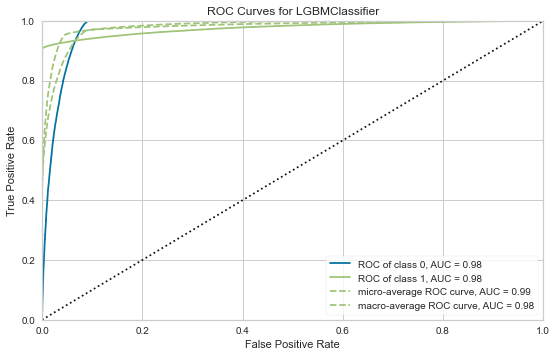

In [64]:
plot_model(best_model2)

In [63]:
evaluate_model(best_model2)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [ ]:
pred_holdout_mod2 = predict_model(best_model2[1])

In [ ]:
pred_holdout_mod3 = predict_model(best_model2[2])

# MODEL CREATION USING PYCARET &  COMMON FEATURES FROM STEP BACKWARD AND RFE 

In [65]:
data = train_imbalanced[feat_common_stepbkwd_rfe]

In [66]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(562710, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [67]:
best_model3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9516,0.9753,0.9056,0.9973,0.9492,0.9031,0.9070,4.1350
et,Extra Trees Classifier,0.9514,0.9823,0.9166,0.9851,0.9496,0.9027,0.9049,81.8520
rf,Random Forest Classifier,0.9488,0.9755,0.9031,0.9940,0.9464,0.8977,0.9015,51.7450
gbc,Gradient Boosting Classifier,0.9386,0.9706,0.8848,0.9914,0.9351,0.8771,0.8822,81.8230
ada,Ada Boost Classifier,0.9038,0.9565,0.8661,0.9367,0.9000,0.8075,0.8099,18.5080
dt,Decision Tree Classifier,0.9019,0.9019,0.9078,0.8971,0.9024,0.8037,0.8038,2.6090
qda,Quadratic Discriminant Analysis,0.7103,0.7764,0.7778,0.6853,0.7286,0.4206,0.4245,0.6310
ridge,Ridge Classifier,0.6768,0.0000,0.7375,0.6576,0.6953,0.3536,0.3562,0.2250
lda,Linear Discriminant Analysis,0.6768,0.7328,0.7376,0.6576,0.6953,0.3536,0.3562,0.8140
nb,Naive Bayes,0.5679,0.6013,0.8129,0.5455,0.6529,0.1357,0.1557,0.2210


In [68]:
pred_holdout_mod21 = predict_model(best_model3[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9514,0.9756,0.9054,0.9970,0.9490,0.9027,0.9065


In [69]:
pred_holdout_mod22 = predict_model(best_model3[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9527,0.9832,0.9188,0.9856,0.9511,0.9055,0.9075


In [70]:
pred_holdout_mod23 = predict_model(best_model3[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9490,0.9765,0.9039,0.9935,0.9466,0.8980,0.9017


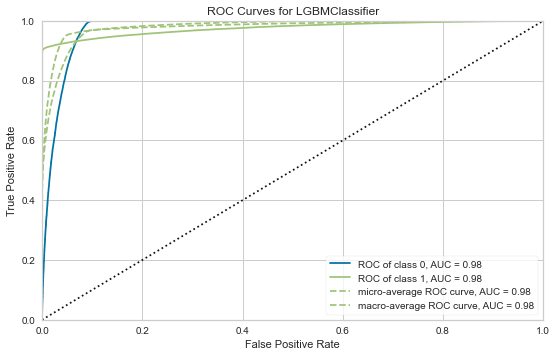

In [71]:
plot_model(best_model3[0])

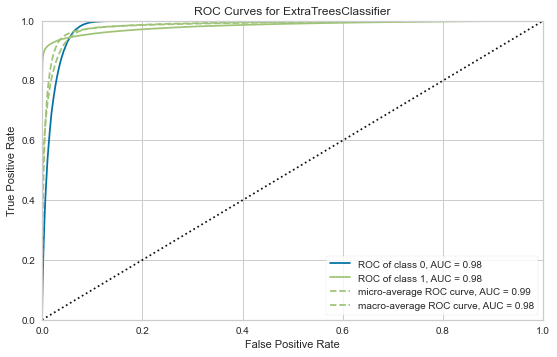

In [72]:
plot_model(best_model3[1])

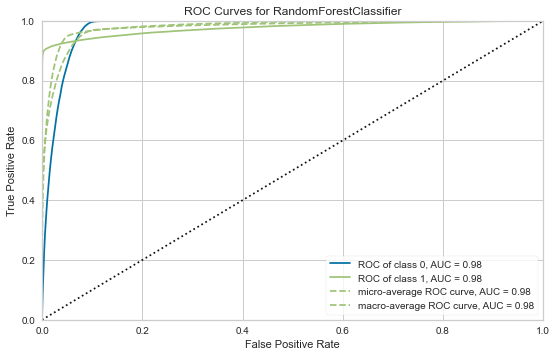

In [73]:
plot_model(best_model3[2])

In [74]:
evaluate_model(best_model3[0])

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


# MODEL CREATION USING PYCARET &  COMMON FEATURES FROM  STEP BACKWARD AND STEP FORWARD

In [75]:
data = train_imbalanced[feat_common_stepbkwd_stepfwd]

In [76]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(562710, 16)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
best_model4 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9550,0.9807,0.9136,0.9961,0.9531,0.9100,0.9131,48.0770
lightgbm,Light Gradient Boosting Machine,0.9547,0.9689,0.9098,0.9995,0.9526,0.9094,0.9131,4.2920
rf,Random Forest Classifier,0.9536,0.9687,0.9092,0.9977,0.9514,0.9071,0.9107,51.8710
gbc,Gradient Boosting Classifier,0.9498,0.9649,0.9010,0.9985,0.9472,0.8996,0.9040,85.2010
ada,Ada Boost Classifier,0.9241,0.9552,0.8719,0.9736,0.9199,0.8482,0.8529,18.8160
dt,Decision Tree Classifier,0.9066,0.9066,0.9143,0.9004,0.9073,0.8132,0.8133,3.0650
qda,Quadratic Discriminant Analysis,0.6679,0.7246,0.7552,0.6430,0.6946,0.3359,0.3411,0.8230
knn,K Neighbors Classifier,0.6220,0.6654,0.6815,0.6090,0.6432,0.2439,0.2457,4.0180
ridge,Ridge Classifier,0.5914,0.0000,0.6290,0.5850,0.6062,0.1829,0.1834,0.2840
lda,Linear Discriminant Analysis,0.5914,0.6261,0.6290,0.5851,0.6062,0.1829,0.1834,0.8980


In [78]:
pred_holdout_mod31 = predict_model(best_model4[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8685,0.8685,0.8718,0.8662,0.8690,0.7371,0.7371


In [79]:
pred_holdout_mod32 = predict_model(best_model4[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8815,0.8815,0.8831,0.8803,0.8817,0.7630,0.7630


In [80]:
pred_holdout_mod33 = predict_model(best_model4[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8624,0.8624,0.8658,0.8599,0.8628,0.7247,0.7247


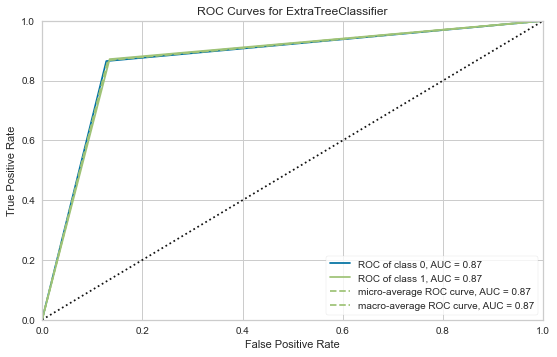

In [81]:
plot_model(best_model4[0])

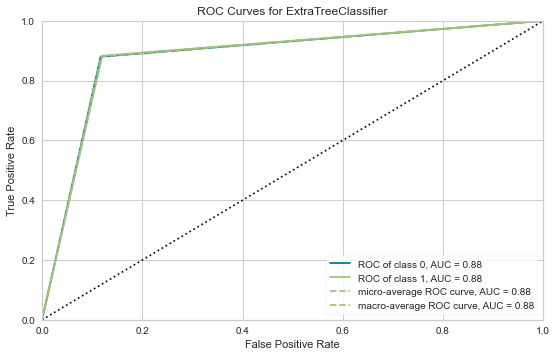

In [82]:
plot_model(best_model4[1])

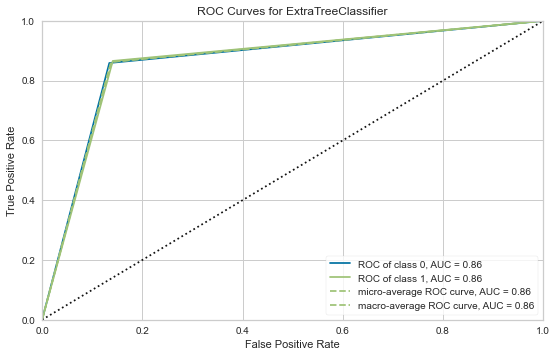

In [83]:
plot_model(best_model4[2])

In [84]:
evaluate_model(best_model4[0])

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


# MODEL CREATION USING PYCARET &  FEATURES FROM  STEP FORWARD SELECTION

In [62]:
step_fwd_feat

['AMT_INCOME_TOTAL',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'NEW_INC_BY_ORG',
 'NEW_EXT_SOURCES_MEAN',
 'NAME_TYPE_SUITE_ordered',
 'NAME_INCOME_TYPE_ordered',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'WEEKDAY_APPR_PROCESS_START_ordered',
 'BURO_DAYS_CREDIT_ENDDATE_MAX',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'PREV_APP_CREDIT_PERC_MEAN',
 'PREV_HOUR_APPR_PROCESS_START_MIN',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
 'INS_DBD_MAX',
 'INS_DBD_SUM',
 'INS_AMT_PAYMENT_MIN',
 'INS_AMT_PAYMENT_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'INS_DAYS_ENTRY_PAYMENT_MEAN',
 'TARGET']

In [61]:
step_fwd_feat.append('TARGET')

In [63]:
#step_fwd_feat.append('TARGET')
data = train_imbalanced[step_fwd_feat]

In [64]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(562710, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [59]:
best_model5 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9665,0.9918,0.9508,0.9816,0.9659,0.9330,0.9334,91.8940
lightgbm,Light Gradient Boosting Machine,0.9549,0.9781,0.9113,0.9984,0.9529,0.9098,0.9133,8.3470
rf,Random Forest Classifier,0.9537,0.9808,0.9099,0.9972,0.9515,0.9073,0.9108,85.3640
gbc,Gradient Boosting Classifier,0.9485,0.9732,0.9020,0.9945,0.9460,0.8971,0.9010,152.3190
ada,Ada Boost Classifier,0.9205,0.9636,0.8873,0.9504,0.9178,0.8410,0.8429,30.0580
dt,Decision Tree Classifier,0.9035,0.9035,0.9123,0.8965,0.9043,0.8069,0.8071,6.8110
knn,K Neighbors Classifier,0.7845,0.8802,0.9408,0.7168,0.8136,0.5690,0.5990,7.9890
qda,Quadratic Discriminant Analysis,0.7353,0.8054,0.7706,0.7198,0.7443,0.4706,0.4718,1.5970
ridge,Ridge Classifier,0.6966,0.0000,0.7025,0.6944,0.6984,0.3932,0.3933,0.3550
lda,Linear Discriminant Analysis,0.6966,0.7608,0.7024,0.6943,0.6984,0.3932,0.3932,3.9110


In [60]:
pred_holdout_mod41 = predict_model(best_model5[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9692,0.9929,0.9542,0.9837,0.9687,0.9384,0.9388


In [61]:
pred_holdout_mod42 = predict_model(best_model5[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9549,0.9785,0.9117,0.9979,0.9529,0.9098,0.9132


In [62]:
pred_holdout_mod43 = predict_model(best_model5[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9541,0.9816,0.9106,0.9973,0.9520,0.9082,0.9116


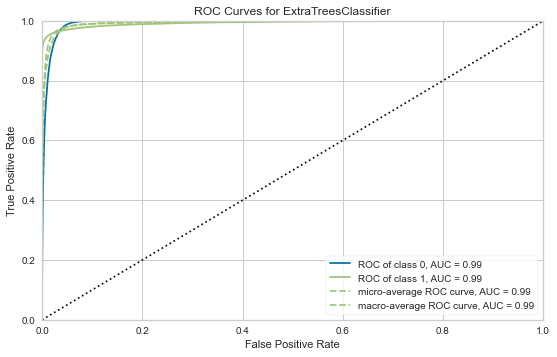

In [63]:
plot_model(best_model5[0])

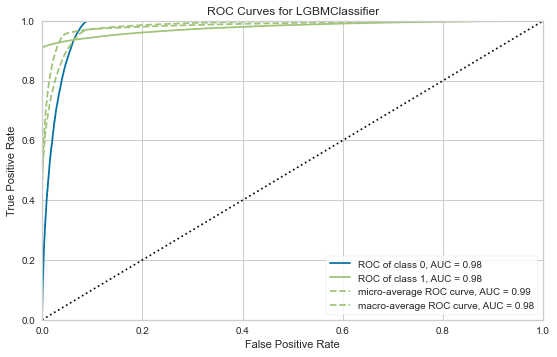

In [64]:
plot_model(best_model5[1])

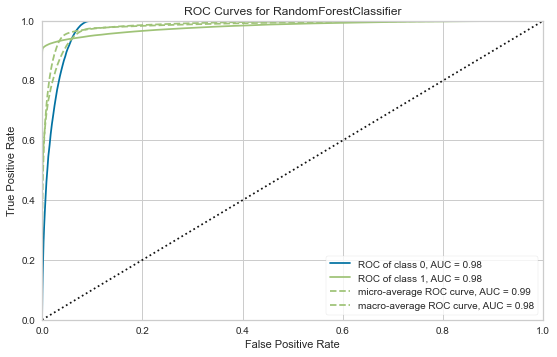

In [65]:
plot_model(best_model5[2])

In [66]:
evaluate_model(best_model5[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [67]:
evaluate_model(best_model5[1])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [68]:
evaluate_model(best_model5[2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [69]:
best_model5[0]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [70]:
best_model5[1]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [71]:
best_model5[2]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

# AFTER APPLYING TUNING 

In [72]:
tuned_model_ETC = tune_model(best_model5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7933,0.8881,0.8335,0.7715,0.8013,0.5866,0.5886
1,0.7939,0.8903,0.8344,0.7718,0.8019,0.5877,0.5897
2,0.7914,0.8890,0.8324,0.7692,0.7996,0.5827,0.5847
3,0.7897,0.8862,0.8251,0.7705,0.7969,0.5793,0.5808
4,0.7863,0.8851,0.8262,0.7652,0.7945,0.5727,0.5745
5,0.7898,0.8861,0.8287,0.7689,0.7977,0.5796,0.5814
6,0.7911,0.8875,0.8323,0.7689,0.7994,0.5822,0.5842
7,0.7922,0.8885,0.8339,0.7697,0.8005,0.5845,0.5865
8,0.7938,0.8898,0.8382,0.7698,0.8025,0.5875,0.5899
9,0.7925,0.8873,0.8338,0.7702,0.8007,0.5850,0.5870


In [73]:
evaluate_model(tuned_model_ETC)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [74]:
tuned_model_LGBM = tune_model(best_model5[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9554,0.9783,0.9134,0.9971,0.9534,0.9107,0.9140
1,0.9576,0.9794,0.9174,0.9976,0.9558,0.9152,0.9182
2,0.9550,0.9784,0.9125,0.9972,0.9530,0.9100,0.9133
3,0.9544,0.9778,0.9121,0.9964,0.9524,0.9088,0.9121
4,0.9560,0.9780,0.9153,0.9964,0.9541,0.9120,0.9150
5,0.9552,0.9780,0.9129,0.9972,0.9532,0.9103,0.9136
6,0.9549,0.9788,0.9129,0.9966,0.9529,0.9098,0.9130
7,0.9553,0.9782,0.9132,0.9971,0.9533,0.9106,0.9138
8,0.9555,0.9784,0.9138,0.9970,0.9536,0.9110,0.9142
9,0.9560,0.9777,0.9140,0.9977,0.9540,0.9119,0.9151


In [75]:
evaluate_model(tuned_model_LGBM)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
tuned_model_RFC = tune_model(best_model5[2])

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:45:18
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 20.0min


In [ ]:
evaluate_model(tuned_model_RFC)

### CREATING ETC, LGBM AND RFC MODELS 

In [ ]:
etc_model = create_model('et')

In [ ]:
lgbm = create_model('lgbm')

In [ ]:
rf_model = create_model('rf' )

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:57:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [ ]:
tuned_model_et = tune_model(tuned_model_et)

In [ ]:
tuned_model_lgm = 

In [ ]:
tuned_model_rf = 

### CREATING BAGGING ENSEMBLE 

In [ ]:
tuned_model_top3 =[tuned_model_et,tuned_model_rf,tuned_model_lgm]

# MODEL CREATION USING PYCARET &  FEATURES FROM  RFE SELECTION

In [99]:
rfe_feat.append('TARGET')
data = train_imbalanced[rfe_feat]

In [100]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(562710, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [101]:
best_model6 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9607,0.9895,0.9487,0.9721,0.9602,0.9214,0.9217,68.8250
lightgbm,Light Gradient Boosting Machine,0.9543,0.9782,0.9122,0.9961,0.9523,0.9086,0.9119,6.5460
rf,Random Forest Classifier,0.9510,0.9804,0.9120,0.9892,0.9490,0.9020,0.9048,96.1890
gbc,Gradient Boosting Classifier,0.9455,0.9741,0.9046,0.9853,0.9432,0.8910,0.8940,164.2980
ada,Ada Boost Classifier,0.9143,0.9647,0.9018,0.9250,0.9133,0.8287,0.8290,32.9680
dt,Decision Tree Classifier,0.8946,0.8946,0.9027,0.8883,0.8954,0.7892,0.7893,8.0860
qda,Quadratic Discriminant Analysis,0.7180,0.8033,0.8289,0.6785,0.7462,0.4360,0.4472,1.6850
knn,K Neighbors Classifier,0.7088,0.7785,0.8161,0.6719,0.7370,0.4175,0.4275,5.8840
lda,Linear Discriminant Analysis,0.6978,0.7640,0.7031,0.6957,0.6994,0.3955,0.3955,3.6270
ridge,Ridge Classifier,0.6977,0.0000,0.7032,0.6956,0.6994,0.3955,0.3955,0.3370


In [102]:
pred_holdout_mod41 = predict_model(best_model6[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9640,0.9905,0.9526,0.9748,0.9636,0.9279,0.9282


In [103]:
pred_holdout_mod42 = predict_model(best_model6[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9542,0.9783,0.9124,0.9956,0.9522,0.9084,0.9116


In [104]:
pred_holdout_mod43 = predict_model(best_model6[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9520,0.9808,0.9131,0.9900,0.9500,0.9039,0.9067


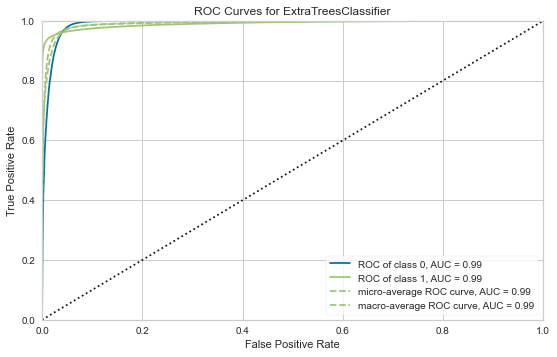

In [105]:
plot_model(best_model6[0])

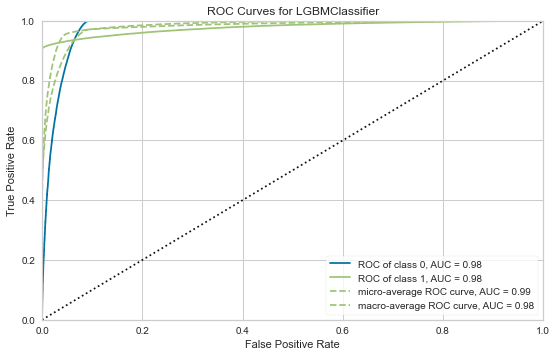

In [106]:
plot_model(best_model6[1])

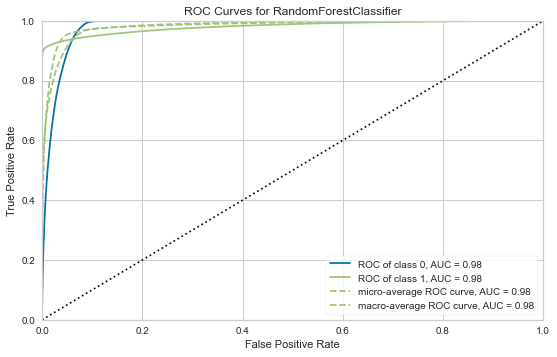

In [107]:
plot_model(best_model6[2])

In [108]:
evaluate_model(best_model6[0])

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


# MODEL CREATION USING PYCARET &  FEATURES FROM  STEP BACKWARD SELECTION

In [52]:
train_imbalanced.dtypes

Unnamed: 0                                        int64
Unnamed: 0.1                                      int64
Unnamed: 0.1.1                                    int64
SK_ID_CURR                                        int64
AMT_INCOME_TOTAL                                float64
AMT_CREDIT                                      float64
AMT_ANNUITY                                     float64
AMT_GOODS_PRICE                                 float64
REGION_POPULATION_RELATIVE                      float64
DAYS_BIRTH                                      float64
DAYS_EMPLOYED                                   float64
DAYS_REGISTRATION                               float64
DAYS_ID_PUBLISH                                 float64
CNT_FAM_MEMBERS                                 float64
HOUR_APPR_PROCESS_START                           int64
EXT_SOURCE_1                                    float64
EXT_SOURCE_2                                    float64
EXT_SOURCE_3                                    

In [47]:
step_bkwd_feat.remove('SK_ID_CURR')
step_bkwd_feat

['AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NEW_CREDIT_TO_INCOME_RATIO',
 'NEW_SOURCES_PROD',
 'NEW_SCORES_STD',
 'NAME_TYPE_SUITE_ordered',
 'NAME_INCOME_TYPE_ordered',
 'NAME_EDUCATION_TYPE_ordered',
 'NAME_FAMILY_STATUS_ordered',
 'WEEKDAY_APPR_PROCESS_START_ordered',
 'ORGANIZATION_TYPE_ordered',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_DAYS_CREDIT_UPDATE_MAX',
 'PREV_APP_CREDIT_PERC_MAX',
 'PREV_RATE_DOWN_PAYMENT_MIN',
 'PREV_DAYS_DECISION_MAX',
 'PREV_CNT_PAYMENT_MEAN',
 'POS_MONTHS_BALANCE_MAX',
 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
 'INS_DPD_MAX',
 'INS_AMT_PAYMENT_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'INS_DAYS_ENTRY_PAYMENT_MEAN']

In [49]:
train_imbalanced = train_imbalanced_sm_tk

In [54]:
step_bkwd_feat.append('TARGET')
data = train_imbalanced[step_bkwd_feat]

In [55]:
data = setup(data = data, target = 'TARGET', session_id=123)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:45:18
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
best_model6 = compare_models(n_select = 3)

In [ ]:
pred_holdout_mod41 = predict_model(best_model6[0])

In [ ]:
pred_holdout_mod42 = predict_model(best_model6[1])

In [ ]:
pred_holdout_mod43 = predict_model(best_model6[2])

In [ ]:
plot_model(best_model6[0])

In [ ]:
plot_model(best_model6[1])

In [ ]:
plot_model(best_model6[2])

In [ ]:
evaluate_model(best_model6[0])

#### FROM THE FEATURE SELECTION EXERCISE, A COMPAIRSON OF THE 5 DATASETS SHOW THAT THE DATASET IWTH THE HIGHEST MODELPERFOCMANCE IS THE DATASET COMPRISED OF FEATURES FROM STEP FORWARD SELECTION AND RFE EMBEDDED METHODS. 


# CLASS IMBALANCE TECHNIQUE AND MODEL PERFORMANCE COMPARISON

#### DATASET WITHOUT CLASS IMBALANCE 

In [121]:
dataset_path = 'train_df_wo_imbalance_74_feat.csv'
train_df_wo_imbalance = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_df_wo_imbalance.shape)

 Train data shape:  (307511, 75)


In [122]:
data = train_df_wo_imbalance[feat_common_rfe_step_fwd]

In [123]:
print(' Train data shape: ', data.shape)

 Train data shape:  (307511, 14)


In [124]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(307511, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [125]:
best_model6 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9197,0.5293,0.0000,0.0000,0.0000,0.0000,0.0000,0.7430
ridge,Ridge Classifier,0.9197,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1270
nb,Naive Bayes,0.9196,0.5801,0.0001,0.0833,0.0002,0.0000,0.0004,0.1300
ada,Ada Boost Classifier,0.9196,0.7359,0.0065,0.4821,0.0129,0.0107,0.0484,5.8760
gbc,Gradient Boosting Classifier,0.9196,0.7383,0.0046,0.4796,0.0090,0.0075,0.0403,25.9590
lightgbm,Light Gradient Boosting Machine,0.9196,0.7370,0.0031,0.4779,0.0062,0.0051,0.0332,1.2650
rf,Random Forest Classifier,0.9195,0.7085,0.0083,0.4430,0.0163,0.0135,0.0518,23.0070
lda,Linear Discriminant Analysis,0.9193,0.7278,0.0121,0.4256,0.0235,0.0191,0.0606,0.4070
et,Extra Trees Classifier,0.9193,0.6997,0.0065,0.3795,0.0127,0.0101,0.0406,16.1740
qda,Quadratic Discriminant Analysis,0.9160,0.7122,0.0561,0.3557,0.0968,0.0766,0.1147,0.2930


In [126]:
pred_holdout_mod41 = predict_model(best_model6[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9183,0.5231,0.0000,0.0000,0.0000,0.0000,0.0000


In [127]:
pred_holdout_mod42 = predict_model(best_model6[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9183,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [128]:
pred_holdout_mod43 = predict_model(best_model6[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9182,0.5799,0.0003,0.1333,0.0005,0.0002,0.0024


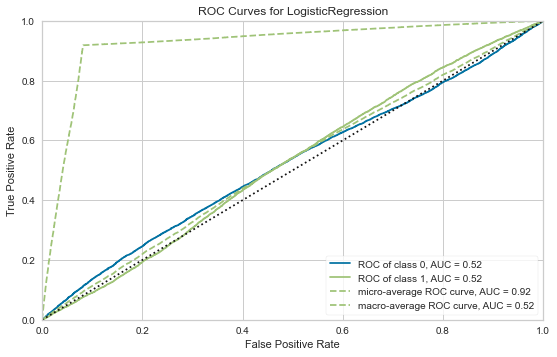

In [129]:
plot_model(best_model6[0])

In [130]:
plot_model(best_model6[1])

TypeError: AUC plot not available for estimators with no predict_proba attribute.

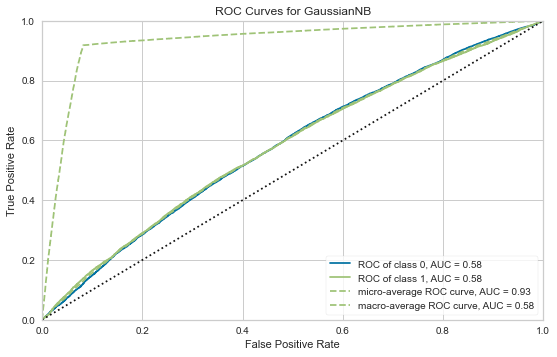

In [131]:
plot_model(best_model6[2])

In [132]:
evaluate_model(best_model6[0])

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


#### DATASET WITH SMOTE

In [133]:
dataset_path = '4NOVtrain_sm_balanced.csv'
train_df_w_SMOTE = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_df_w_SMOTE.shape)

 Train data shape:  (564832, 75)


In [134]:
data = train_df_w_SMOTE[feat_common_rfe_step_fwd]

In [135]:
print(' Train data shape: ', data.shape)

 Train data shape:  (564832, 14)


In [136]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(564832, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [137]:
best_model6 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9537,0.9763,0.9092,0.9979,0.9515,0.9073,0.9109,6.6960
et,Extra Trees Classifier,0.9527,0.9828,0.9182,0.9863,0.9510,0.9054,0.9076,75.5680
rf,Random Forest Classifier,0.9504,0.9767,0.9064,0.9938,0.9481,0.9008,0.9043,47.5060
gbc,Gradient Boosting Classifier,0.9420,0.9721,0.8915,0.9916,0.9389,0.8840,0.8886,68.1000
ada,Ada Boost Classifier,0.9088,0.9575,0.8677,0.9453,0.9048,0.8175,0.8203,15.0620
dt,Decision Tree Classifier,0.9036,0.9036,0.9100,0.8984,0.9041,0.8071,0.8072,2.6230
qda,Quadratic Discriminant Analysis,0.7054,0.7747,0.7719,0.6812,0.7237,0.4109,0.4146,0.5400
ridge,Ridge Classifier,0.6842,0.0000,0.6856,0.6836,0.6846,0.3684,0.3684,0.2210
lda,Linear Discriminant Analysis,0.6842,0.7476,0.6856,0.6836,0.6846,0.3684,0.3685,0.7290
knn,K Neighbors Classifier,0.6681,0.7263,0.7018,0.6574,0.6789,0.3362,0.3370,3.2400


In [138]:
pred_holdout_mod41 = predict_model(best_model6[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9541,0.9763,0.9100,0.9980,0.9520,0.9081,0.9117


In [139]:
pred_holdout_mod42 = predict_model(best_model6[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9547,0.9838,0.9217,0.9868,0.9532,0.9093,0.9113


In [140]:
pred_holdout_mod43 = predict_model(best_model6[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9513,0.9767,0.9083,0.9940,0.9492,0.9027,0.9061


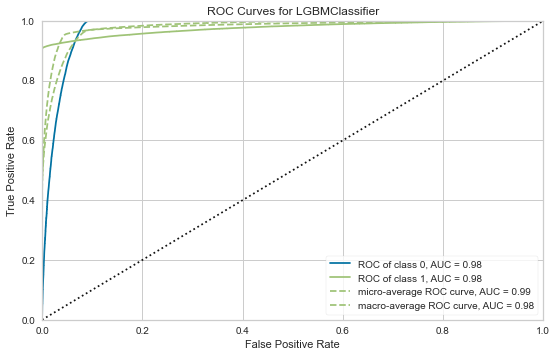

In [141]:
plot_model(best_model6[0])

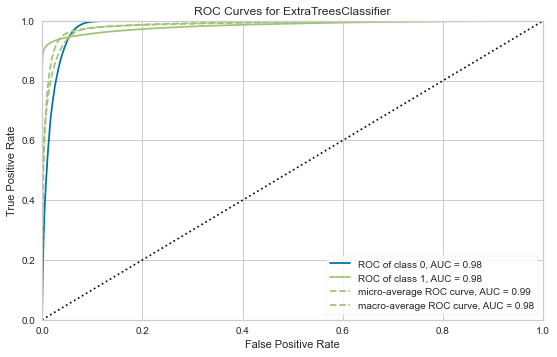

In [142]:
plot_model(best_model6[1])

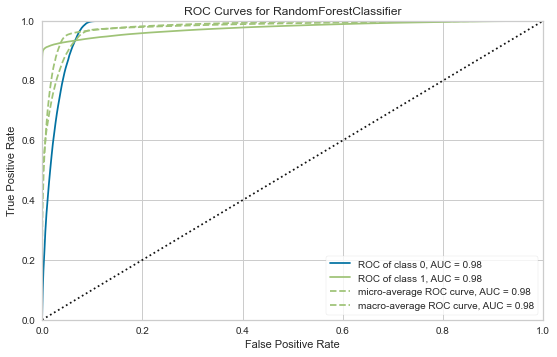

In [143]:
plot_model(best_model6[2])

In [144]:
evaluate_model(best_model6[0])

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


#### DATASET WITH ADASYN

In [145]:
dataset_path = '4NOVtrain_adasyn_balanced.csv'
train_df_w_ADASYN = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_df_w_ADASYN.shape)

 Train data shape:  (556895, 75)


In [146]:
data = train_df_w_ADASYN[feat_common_rfe_step_fwd]

In [147]:
print(' Train data shape: ', data.shape)

 Train data shape:  (556895, 14)


In [148]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(556895, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [149]:
best_model6 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9533,0.9758,0.9071,0.9980,0.9504,0.9065,0.9102,5.5440
et,Extra Trees Classifier,0.9520,0.9822,0.9148,0.9869,0.9495,0.9039,0.9063,123.3790
rf,Random Forest Classifier,0.9498,0.9761,0.9036,0.9939,0.9466,0.8994,0.9030,50.5040
gbc,Gradient Boosting Classifier,0.9417,0.9715,0.8894,0.9914,0.9376,0.8832,0.8878,68.9140
ada,Ada Boost Classifier,0.9088,0.9569,0.8648,0.9454,0.9033,0.8173,0.8203,15.2560
dt,Decision Tree Classifier,0.9030,0.9031,0.9090,0.8957,0.9023,0.8061,0.8062,2.8740
qda,Quadratic Discriminant Analysis,0.7061,0.7751,0.7688,0.6779,0.7204,0.4132,0.4168,0.6110
ridge,Ridge Classifier,0.6840,0.0000,0.6748,0.6810,0.6779,0.3678,0.3679,0.2440
lda,Linear Discriminant Analysis,0.6840,0.7477,0.6748,0.6810,0.6779,0.3678,0.3679,0.7920
knn,K Neighbors Classifier,0.6637,0.7215,0.6893,0.6495,0.6688,0.3278,0.3284,3.4210


In [150]:
pred_holdout_mod41 = predict_model(best_model6[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9528,0.9755,0.9061,0.9981,0.9499,0.9055,0.9093


In [151]:
pred_holdout_mod42 = predict_model(best_model6[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9526,0.9828,0.9163,0.9866,0.9501,0.9050,0.9073


In [152]:
pred_holdout_mod43 = predict_model(best_model6[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9494,0.9761,0.9031,0.9938,0.9463,0.8986,0.9023


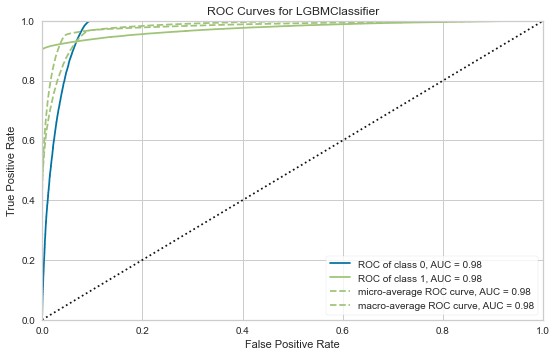

In [153]:
plot_model(best_model6[0])

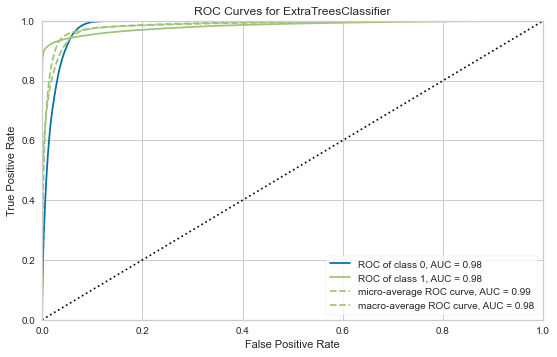

In [154]:
plot_model(best_model6[1])

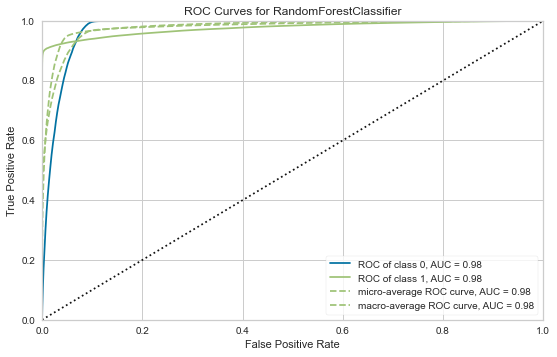

In [155]:
plot_model(best_model6[2])

In [156]:
evaluate_model(best_model6[0])

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


#### DATASET WITH TOMEK

In [157]:
dataset_path = '4NOVtrain_tomek_balanced.csv'
train_df_w_TOMEK = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_df_w_TOMEK.shape)

 Train data shape:  (296127, 75)


In [158]:
data = train_df_w_TOMEK[feat_common_rfe_step_fwd]

In [159]:
print(' Train data shape: ', data.shape)

 Train data shape:  (296127, 14)


In [160]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(296127, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [161]:
best_model6 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9160,0.5260,0.0000,0.0000,0.0000,0.0000,0.0000,9.0510
ridge,Ridge Classifier,0.9160,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3200
ada,Ada Boost Classifier,0.9160,0.7351,0.0090,0.4950,0.0177,0.0147,0.0575,5.6470
lightgbm,Light Gradient Boosting Machine,0.9160,0.7374,0.0061,0.4974,0.0120,0.0100,0.0473,1.3960
gbc,Gradient Boosting Classifier,0.9159,0.7375,0.0066,0.4788,0.0130,0.0108,0.0482,25.6850
nb,Naive Bayes,0.9158,0.5786,0.0003,0.1250,0.0006,0.0001,0.0017,0.1950
rf,Random Forest Classifier,0.9158,0.7097,0.0098,0.4416,0.0192,0.0157,0.0557,23.1390
lda,Linear Discriminant Analysis,0.9156,0.7271,0.0132,0.4288,0.0256,0.0207,0.0633,0.4350
et,Extra Trees Classifier,0.9156,0.7034,0.0083,0.3956,0.0162,0.0128,0.0470,15.6870
qda,Quadratic Discriminant Analysis,0.9119,0.7121,0.0605,0.3570,0.1034,0.0811,0.1182,0.3060


In [162]:
pred_holdout_mod41 = predict_model(best_model6[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9168,0.5280,0.0000,0.0000,0.0000,0.0000,0.0000


In [163]:
pred_holdout_mod42 = predict_model(best_model6[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9168,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [164]:
pred_holdout_mod43 = predict_model(best_model6[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9169,0.7381,0.0097,0.5255,0.0191,0.0162,0.0630


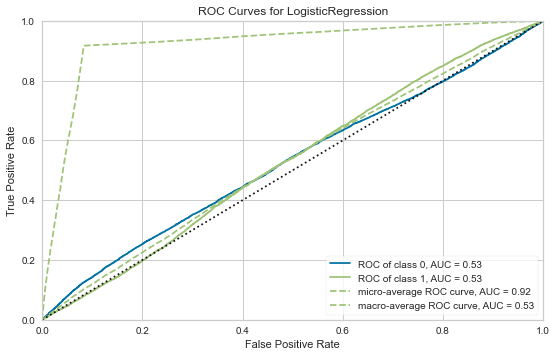

In [165]:
plot_model(best_model6[0])

In [166]:
plot_model(best_model6[1])

TypeError: AUC plot not available for estimators with no predict_proba attribute.

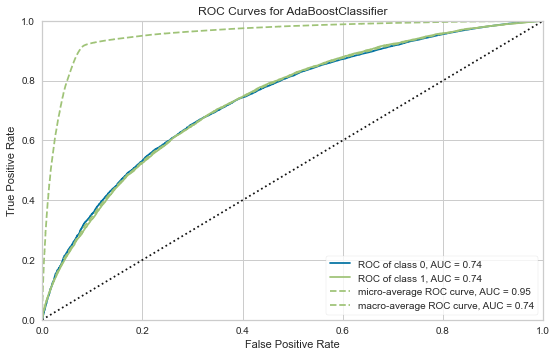

In [167]:
plot_model(best_model6[2])

In [168]:
evaluate_model(best_model6[0])

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [169]:
best_model6[0].get_params


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

#### DATASET WITH ENN

In [170]:
dataset_path = '4NOVtrain_enn_balanced.csv'
train_df_w_ENN = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_df_w_ENN.shape)

 Train data shape:  (245802, 75)


In [171]:
data = train_df_w_ENN[feat_common_rfe_step_fwd]

In [172]:
print(' Train data shape: ', data.shape)

 Train data shape:  (245802, 14)


In [173]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(245802, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [174]:
best_model6 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8993,0.7422,0.0206,0.5364,0.0396,0.0324,0.0898,4.6140
gbc,Gradient Boosting Classifier,0.8993,0.7460,0.0193,0.5359,0.0372,0.0304,0.0869,20.4850
lightgbm,Light Gradient Boosting Machine,0.8991,0.7458,0.0193,0.5131,0.0371,0.0301,0.0843,1.0510
lr,Logistic Regression,0.8990,0.5350,0.0000,0.0000,0.0000,0.0000,0.0000,0.6510
ridge,Ridge Classifier,0.8990,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1350
nb,Naive Bayes,0.8989,0.5880,0.0003,0.1429,0.0007,0.0002,0.0026,0.1230
rf,Random Forest Classifier,0.8988,0.7230,0.0229,0.4795,0.0436,0.0347,0.0872,18.2880
lda,Linear Discriminant Analysis,0.8985,0.7332,0.0274,0.4601,0.0517,0.0408,0.0926,0.3390
et,Extra Trees Classifier,0.8985,0.7129,0.0176,0.4395,0.0339,0.0263,0.0715,12.5340
qda,Quadratic Discriminant Analysis,0.8931,0.7182,0.1014,0.3882,0.1607,0.1241,0.1568,0.2260


In [175]:
pred_holdout_mod41 = predict_model(best_model6[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8993,0.7399,0.0205,0.5067,0.0393,0.0317,0.0862


In [176]:
pred_holdout_mod42 = predict_model(best_model6[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8993,0.7440,0.0172,0.5120,0.0333,0.0269,0.0797


In [177]:
pred_holdout_mod43 = predict_model(best_model6[2])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8993,0.7428,0.0192,0.5144,0.0371,0.0300,0.0845


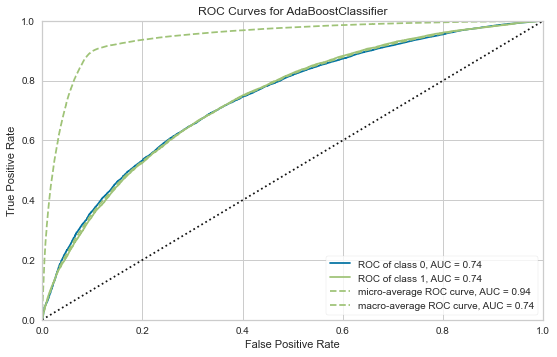

In [178]:
plot_model(best_model6[0])

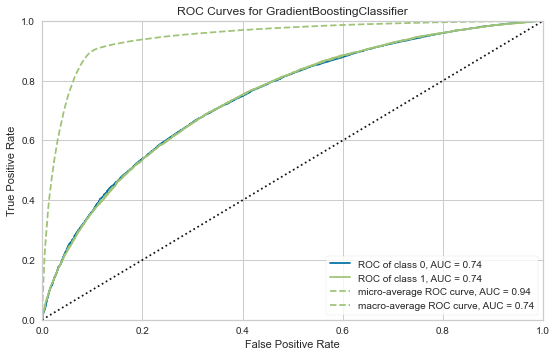

In [179]:
plot_model(best_model6[1])

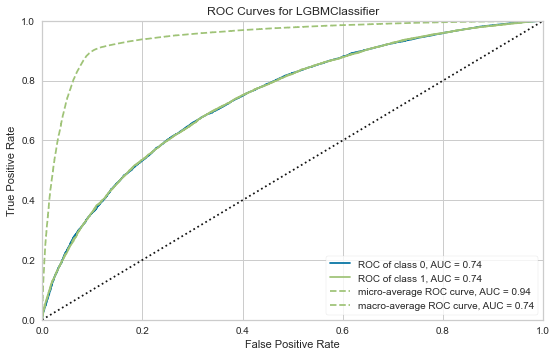

In [180]:
plot_model(best_model6[2])

In [181]:
evaluate_model(best_model6[0])

,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,1.0
n_estimators,50
random_state,123


# Model Explanability

In [37]:
dataset_path = '4NOVtrain_sm_tomek_balanced.csv'
train_imbalanced_sm_tk = pd.read_csv(dataset_path, parse_dates=True, keep_date_col=True)
print(' Train data shape: ', train_imbalanced_sm_tk.shape)

 Train data shape:  (562710, 75)


In [38]:
train_imbalanced = train_imbalanced_sm_tk

In [51]:
data = train_imbalanced[feat_common_rfe_step_fwd]

In [52]:
data.shape

(562710, 14)

In [53]:
data = setup(data = data, target = 'TARGET', session_id=123)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(562710, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [54]:
lgm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9539,0.9764,0.9092,0.9986,0.9518,0.9079,0.9116
1,0.9555,0.9773,0.9130,0.9978,0.9535,0.9109,0.9143
2,0.9534,0.9765,0.9086,0.9980,0.9512,0.9068,0.9105
3,0.9527,0.9755,0.9072,0.9980,0.9505,0.9055,0.9092
4,0.9549,0.9763,0.9119,0.9978,0.9529,0.9098,0.9132
5,0.9530,0.9752,0.9080,0.9979,0.9508,0.9061,0.9098
6,0.9524,0.9759,0.9074,0.9972,0.9502,0.9048,0.9085
7,0.9537,0.9760,0.9087,0.9985,0.9515,0.9074,0.9111
8,0.9534,0.9765,0.9089,0.9976,0.9512,0.9067,0.9103
9,0.9539,0.9757,0.9095,0.9982,0.9518,0.9078,0.9115


In [55]:
pred_label = predict_model(lgm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9539,0.9767,0.9097,0.9978,0.9517,0.9078,0.9113


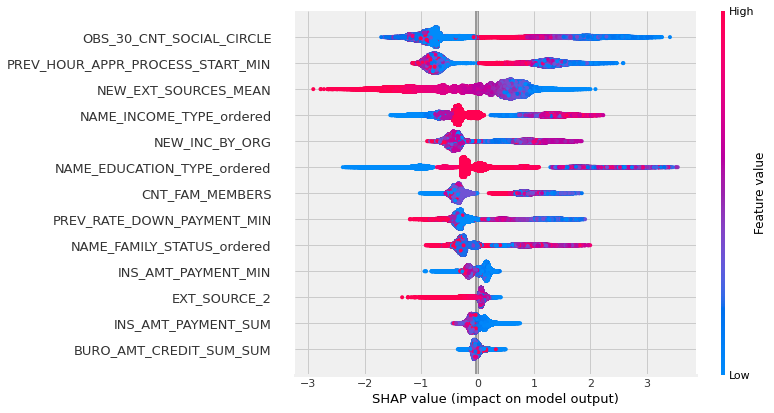

In [66]:
interpret_model(lgm)

In [ ]:
# https://github.com/jentseng/CreditRiskClassification_FATML/blob/master/4_Top20_RF_XG_SHAP.ipynb

In [56]:
import shap
explainer = shap.Explainer(lgm)

In [ ]:
# shap_values = explainer(data, check_additivity=False)

In [62]:
sample = train_imbalanced[feat_common_rfe_step_fwd].head(10000)
sample.dtypes

BURO_AMT_CREDIT_SUM_SUM             float64
PREV_HOUR_APPR_PROCESS_START_MIN    float64
EXT_SOURCE_2                        float64
INS_AMT_PAYMENT_MIN                 float64
NEW_EXT_SOURCES_MEAN                float64
OBS_30_CNT_SOCIAL_CIRCLE            float64
CNT_FAM_MEMBERS                     float64
INS_AMT_PAYMENT_SUM                 float64
PREV_RATE_DOWN_PAYMENT_MIN          float64
NAME_FAMILY_STATUS_ordered          float64
NAME_INCOME_TYPE_ordered            float64
NAME_EDUCATION_TYPE_ordered         float64
NEW_INC_BY_ORG                      float64
TARGET                                int64
dtype: object

In [64]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BURO_AMT_CREDIT_SUM_SUM           10000 non-null  float64
 1   PREV_HOUR_APPR_PROCESS_START_MIN  10000 non-null  float64
 2   EXT_SOURCE_2                      10000 non-null  float64
 3   INS_AMT_PAYMENT_MIN               10000 non-null  float64
 4   NEW_EXT_SOURCES_MEAN              10000 non-null  float64
 5   OBS_30_CNT_SOCIAL_CIRCLE          10000 non-null  float64
 6   CNT_FAM_MEMBERS                   10000 non-null  float64
 7   INS_AMT_PAYMENT_SUM               10000 non-null  float64
 8   PREV_RATE_DOWN_PAYMENT_MIN        10000 non-null  float64
 9   NAME_FAMILY_STATUS_ordered        10000 non-null  float64
 10  NAME_INCOME_TYPE_ordered          10000 non-null  float64
 11  NAME_EDUCATION_TYPE_ordered       10000 non-null  float64
 12  NEW_I

In [65]:
shap_values = explainer(sample)

LightGBMError: The number of features in data (14) is not the same as it was in training data (13).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

### Tuning Models

Compare model just evaluates using the default hyperparameters, tune model will use cross validation to tune the models, here we will tune top 3 models selected in compare models.

In [ ]:
tune_model(best_model[0])


In [ ]:
tune_model(best_model[1])


In [ ]:
tune_model(best_model[2])


### Dimensionality Reduction using PCA

In [81]:
features = train_imbalanced

In [82]:
# features = train_wo_imbalance

In [83]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17982 entries, 0 to 17981
Columns: 178 entries, index to TARGET
dtypes: float64(30), int64(19), uint8(129)
memory usage: 8.9 MB


In [84]:
X = features
y = features['TARGET']


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [87]:
explained_variance

array([0.94569089, 0.03947777])